<a href="https://colab.research.google.com/github/rizkyfauziilmi/TUGAS_UAS_ML/blob/main/clustering_data_kecil.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [291]:
import kagglehub

# Dataset 1: https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python
path_df = kagglehub.dataset_download("vjchoudhary7/customer-segmentation-tutorial-in-python")

# Dataset 2: https://www.kaggle.com/datasets/ruchikakumbhar/obesity-prediction
path_df2 = kagglehub.dataset_download("ruchikakumbhar/obesity-prediction")

# Dataset 2: https://www.kaggle.com/datasets/dnkumars/industrial-equipment-monitoring-dataset
path_df3 = kagglehub.dataset_download("dnkumars/industrial-equipment-monitoring-dataset")

In [292]:
import pandas as pd

df = pd.read_csv(path_df + "/Mall_Customers.csv")
df2 = pd.read_csv(path_df2 + "/Obesity prediction.csv")
df3 = pd.read_csv(path_df3 + "/equipment_anomaly_data.csv")

In [293]:
print("Dataset 1:")
display(df.head())

print("\nDataset 2:")
display(df2.head())

print("\nDataset 3:")
display(df3.head())

Dataset 1:


CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


Dataset 2:


Gender   Age  Height  Weight family_history FAVC  FCVC  NCP       CAEC  \
0  Female  21.0    1.62    64.0            yes   no   2.0  3.0  Sometimes   
1  Female  21.0    1.52    56.0            yes   no   3.0  3.0  Sometimes   
2    Male  23.0    1.80    77.0            yes   no   2.0  3.0  Sometimes   
3    Male  27.0    1.80    87.0             no   no   3.0  3.0  Sometimes   
4    Male  22.0    1.78    89.8             no   no   2.0  1.0  Sometimes   

  SMOKE  CH2O  SCC  FAF  TUE        CALC                 MTRANS  \
0    no   2.0   no  0.0  1.0          no  Public_Transportation   
1   yes   3.0  yes  3.0  0.0   Sometimes  Public_Transportation   
2    no   2.0   no  2.0  1.0  Frequently  Public_Transportation   
3    no   2.0   no  2.0  0.0  Frequently                Walking   
4    no   2.0   no  0.0  0.0   Sometimes  Public_Transportation   

               Obesity  
0        Normal_Weight  
1        Normal_Weight  
2        Normal_Weight  
3   Overweight_Level_I  
4  Overweight_Level_II


Dataset 3:


temperature   pressure  vibration   humidity   equipment       location  \
0    58.180180  25.029278   0.606516  45.694907     Turbine        Atlanta   
1    75.740712  22.954018   2.338095  41.867407  Compressor        Chicago   
2    71.358594  27.276830   1.389198  58.954409     Turbine  San Francisco   
3    71.616985  32.242921   1.770690  40.565138        Pump        Atlanta   
4    66.506832  45.197471   0.345398  43.253795        Pump       New York   

   faulty  
0     0.0  
1     0.0  
2     0.0  
3     0.0  
4     0.0

In [294]:
print("\nDataset 1 Info:")
display(df.info())

print("\nDataset 2 Info:")
display(df2.info())

print("\nDataset 3 Info:")
display(df3.info())


Dataset 1 Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


None


Dataset 2 Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          2111 non-null   object 
 1   Age             2111 non-null   float64
 2   Height          2111 non-null   float64
 3   Weight          2111 non-null   float64
 4   family_history  2111 non-null   object 
 5   FAVC            2111 non-null   object 
 6   FCVC            2111 non-null   float64
 7   NCP             2111 non-null   float64
 8   CAEC            2111 non-null   object 
 9   SMOKE           2111 non-null   object 
 10  CH2O            2111 non-null   float64
 11  SCC             2111 non-null   object 
 12  FAF             2111 non-null   float64
 13  TUE             2111 non-null   float64
 14  CALC            2111 non-null   object 
 15  MTRANS          2111 non-null   object 
 16  Obesity         2111 non-null   object 
dtypes: float64(8), o

None


Dataset 3 Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7672 entries, 0 to 7671
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   temperature  7672 non-null   float64
 1   pressure     7672 non-null   float64
 2   vibration    7672 non-null   float64
 3   humidity     7672 non-null   float64
 4   equipment    7672 non-null   object 
 5   location     7672 non-null   object 
 6   faulty       7672 non-null   float64
dtypes: float64(5), object(2)
memory usage: 419.7+ KB


None

## Data Cleaning

### Standarisasi Nama Kolom

In [295]:
import re

def sanitize_column_names(data: pd.DataFrame) -> pd.DataFrame:
    """
    Membersihkan nama kolom DataFrame dengan cara:
    - Menghapus isi dalam tanda kurung beserta tanda kurungnya.
    - Menghapus semua spasi.
    - Menghapus karakter selain huruf (hanya huruf a-z dan A-Z yang dipertahankan).

    Parameters
    ----------
    data : pd.DataFrame
        DataFrame yang kolomnya ingin dibersihkan.

    Returns
    -------
    pd.DataFrame
        DataFrame dengan nama kolom yang sudah dibersihkan.
    """
    cleaned_columns = []
    for col in data.columns:
        col = re.sub(r'\([^)]*\)', '', col)  # Hilangkan isi dalam tanda kurung dan tanda kurungnya
        col = re.sub(r'\s+', '', col)  # Hilangkan semua spasi
        col = re.sub(r'[^a-zA-Z]', '', col)  # Hilangkan karakter selain huruf
        cleaned_columns.append(col)

    data.columns = cleaned_columns
    return data

#### Dataset 1

In [296]:
print("\nKolom-kolom yang telah dibersihkan dari dataset 1:")
df_clean = sanitize_column_names(df)
print(df_clean.columns)


Kolom-kolom yang telah dibersihkan dari dataset 1:
Index(['CustomerID', 'Gender', 'Age', 'AnnualIncome', 'SpendingScore'], dtype='object')


#### Dataset 2

In [297]:
print("\nKolom-kolom yang telah dibersihkan dari dataset 2:")
df2_clean = sanitize_column_names(df2)
print(df2_clean.columns)


Kolom-kolom yang telah dibersihkan dari dataset 2:
Index(['Gender', 'Age', 'Height', 'Weight', 'familyhistory', 'FAVC', 'FCVC',
       'NCP', 'CAEC', 'SMOKE', 'CHO', 'SCC', 'FAF', 'TUE', 'CALC', 'MTRANS',
       'Obesity'],
      dtype='object')


#### Dataset 3

In [298]:
print("\nKolom-kolom yang telah dibersihkan dari dataset 2:")
df3_clean = sanitize_column_names(df3)
print(df3_clean.columns)


Kolom-kolom yang telah dibersihkan dari dataset 2:
Index(['temperature', 'pressure', 'vibration', 'humidity', 'equipment',
       'location', 'faulty'],
      dtype='object')


### Atasi Data Duplicate

#### Dataset 1

In [299]:
print("\nJumlah duplikat pada dataset 1:")
df_clean.duplicated().sum()


Jumlah duplikat pada dataset 1:


np.int64(0)

#### Dataset 2

In [300]:
print("\nJumlah duplikat pada dataset 2:")
df2_clean.duplicated().sum()


Jumlah duplikat pada dataset 2:


np.int64(24)

In [301]:
df2_clean.drop_duplicates(inplace=True)

print("\nJumlah duplikat pada dataset 2 setelah penghapusan:")
df2_clean.duplicated().sum()


Jumlah duplikat pada dataset 2 setelah penghapusan:


np.int64(0)

#### Dataset 3

In [302]:
print("\nJumlah duplikat pada dataset 3:")
df3_clean.duplicated().sum()


Jumlah duplikat pada dataset 3:


np.int64(0)

### Atasi Data Missing

#### Dataset 1

In [303]:
print("\nJumlah nilai yang hilang pada dataset 1:")
df_clean.isnull().sum()


Jumlah nilai yang hilang pada dataset 1:


CustomerID       0
Gender           0
Age              0
AnnualIncome     0
SpendingScore    0
dtype: int64

#### Dataset 2

In [304]:
print("\nJumlah nilai yang hilang pada dataset 2:")
df2_clean.isnull().sum()


Jumlah nilai yang hilang pada dataset 2:


Gender           0
Age              0
Height           0
Weight           0
familyhistory    0
FAVC             0
FCVC             0
NCP              0
CAEC             0
SMOKE            0
CHO              0
SCC              0
FAF              0
TUE              0
CALC             0
MTRANS           0
Obesity          0
dtype: int64

#### Dataset 3

In [305]:
print("\nJumlah nilai yang hilang pada dataset 3:")
df3_clean.isnull().sum()


Jumlah nilai yang hilang pada dataset 3:


temperature    0
pressure       0
vibration      0
humidity       0
equipment      0
location       0
faulty         0
dtype: int64

### Atasi Data Anomali Numerikal

#### Dataset 1

In [306]:
print("\nStatistik deskriptif untuk dataset 1:")
df_clean.describe()


Statistik deskriptif untuk dataset 1:


CustomerID         Age  AnnualIncome  SpendingScore
count  200.000000  200.000000    200.000000     200.000000
mean   100.500000   38.850000     60.560000      50.200000
std     57.879185   13.969007     26.264721      25.823522
min      1.000000   18.000000     15.000000       1.000000
25%     50.750000   28.750000     41.500000      34.750000
50%    100.500000   36.000000     61.500000      50.000000
75%    150.250000   49.000000     78.000000      73.000000
max    200.000000   70.000000    137.000000      99.000000

#### Dataset 2

In [307]:
print("\nStatistik deskriptif untuk dataset 2:")
df2_clean.describe()


Statistik deskriptif untuk dataset 2:


Age       Height       Weight         FCVC          NCP  \
count  2087.000000  2087.000000  2087.000000  2087.000000  2087.000000   
mean     24.353090     1.702674    86.858730     2.421466     2.701179   
std       6.368801     0.093186    26.190847     0.534737     0.764614   
min      14.000000     1.450000    39.000000     1.000000     1.000000   
25%      19.915937     1.630178    66.000000     2.000000     2.697467   
50%      22.847618     1.701584    83.101100     2.396265     3.000000   
75%      26.000000     1.769491   108.015907     3.000000     3.000000   
max      61.000000     1.980000   173.000000     3.000000     4.000000   

               CHO          FAF          TUE  
count  2087.000000  2087.000000  2087.000000  
mean      2.004749     1.012812     0.663035  
std       0.608284     0.853475     0.608153  
min       1.000000     0.000000     0.000000  
25%       1.590922     0.124505     0.000000  
50%       2.000000     1.000000     0.630866  
75%       2.466193     1.678102     1.000000  
max       3.000000     3.000000     2.000000

#### Dataset 3

In [308]:
print("\nStatistik deskriptif untuk dataset 3:")
df3_clean.describe()


Statistik deskriptif untuk dataset 3:


temperature     pressure    vibration     humidity       faulty
count  7672.000000  7672.000000  7672.000000  7672.000000  7672.000000
mean     70.922478    35.738048     1.611809    50.016574     0.099974
std      16.200059    10.381593     0.728560    11.841479     0.299985
min      10.269385     3.620798    -0.428188    10.215077     0.000000
25%      62.777057    29.485682     1.170906    42.612817     0.000000
50%      70.156900    35.227544     1.533113    50.024744     0.000000
75%      77.568387    41.159913     1.924700    57.340513     0.000000
max     149.690420    79.887734     4.990537    89.984718     1.000000

In [309]:
# Ubah nilai negatif pada vibration menjadi absolut
df3_clean['vibration'] = df3_clean['vibration'].abs()

df3_clean.describe()

temperature     pressure    vibration     humidity       faulty
count  7672.000000  7672.000000  7672.000000  7672.000000  7672.000000
mean     70.922478    35.738048     1.612246    50.016574     0.099974
std      16.200059    10.381593     0.727592    11.841479     0.299985
min      10.269385     3.620798     0.002367    10.215077     0.000000
25%      62.777057    29.485682     1.170906    42.612817     0.000000
50%      70.156900    35.227544     1.533113    50.024744     0.000000
75%      77.568387    41.159913     1.924700    57.340513     0.000000
max     149.690420    79.887734     4.990537    89.984718     1.000000

### Atasi Data Anomali Kategorikal

In [310]:
def describe_categorical_columns(df: pd.DataFrame) -> None:
    """
    Menampilkan deskripsi ringkas untuk setiap kolom kategorikal pada DataFrame.

    Fungsi ini akan:
    - Mendeteksi kolom bertipe kategorikal (object/category).
    - Menampilkan nama kolom dan distribusi nilai (termasuk NaN jika ada) untuk setiap kolom kategorikal.
    - Jika tidak ada kolom kategorikal, akan mencetak pesan informasi.

    Parameters
    ----------
    df : pd.DataFrame
        DataFrame yang ingin dianalisis kolom kategorikalnya.

    Returns
    -------
    None
    """
    categorical_cols = df.select_dtypes(include=['object', 'category']).columns

    if len(categorical_cols) == 0:
        print("Tidak ada kolom kategorial dalam DataFrame.")
        return

    for col in categorical_cols:
        print(f"\nKolom: {col}")
        print(df[col].value_counts(dropna=False))  # Termasuk NaN jika ada


#### Dataset 1

In [311]:
print("\nDeskripsi Kolom Kategorial untuk Dataset 1:")
describe_categorical_columns(df_clean)


Deskripsi Kolom Kategorial untuk Dataset 1:

Kolom: Gender
Gender
Female    112
Male       88
Name: count, dtype: int64


#### Dataset 2

In [312]:
print("\nDeskripsi Kolom Kategorial untuk Dataset 2:")
describe_categorical_columns(df2_clean)


Deskripsi Kolom Kategorial untuk Dataset 2:

Kolom: Gender
Gender
Male      1052
Female    1035
Name: count, dtype: int64

Kolom: familyhistory
familyhistory
yes    1722
no      365
Name: count, dtype: int64

Kolom: FAVC
FAVC
yes    1844
no      243
Name: count, dtype: int64

Kolom: CAEC
CAEC
Sometimes     1761
Frequently     236
Always          53
no              37
Name: count, dtype: int64

Kolom: SMOKE
SMOKE
no     2043
yes      44
Name: count, dtype: int64

Kolom: SCC
SCC
no     1991
yes      96
Name: count, dtype: int64

Kolom: CALC
CALC
Sometimes     1380
no             636
Frequently      70
Always           1
Name: count, dtype: int64

Kolom: MTRANS
MTRANS
Public_Transportation    1558
Automobile                456
Walking                    55
Motorbike                  11
Bike                        7
Name: count, dtype: int64

Kolom: Obesity
Obesity
Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_II    290
Normal_Weight    

#### Dataset 3

In [313]:
print("\nDeskripsi Kolom Kategorial untuk Dataset 3:")
describe_categorical_columns(df3_clean)


Deskripsi Kolom Kategorial untuk Dataset 3:

Kolom: equipment
equipment
Compressor    2573
Turbine       2565
Pump          2534
Name: count, dtype: int64

Kolom: location
location
Atlanta          1564
Chicago          1553
Houston          1548
New York         1526
San Francisco    1481
Name: count, dtype: int64


## Exploratory Data Analysis (EDA)

### Visualisasi Kolom Kategorikal dan Numerikal

In [314]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_numerical_and_categorical(
    df: pd.DataFrame,
    numerical_cols: list = [],
    categorical_cols: list = []
) -> None:
    """
    Menampilkan visualisasi distribusi data numerik dan kategorikal pada DataFrame.

    - Untuk kolom numerik: menampilkan histogram dan boxplot.
    - Untuk kolom kategorikal: menampilkan countplot.

    Parameters
    ----------
    df : pd.DataFrame
        DataFrame yang akan divisualisasikan.
    numerical_cols : list
        Daftar nama kolom numerik.
    categorical_cols : list
        Daftar nama kolom kategorikal.
    """
    sns.set_theme(style="whitegrid")

    # Plot untuk kolom numerik
    for col in numerical_cols:
        fig, axes = plt.subplots(1, 2, figsize=(12, 4))
        fig.suptitle(f"Distribusi & Outlier: {col}", fontsize=14)

        # Histogram
        sns.histplot(df[col], kde=True, ax=axes[0], color="skyblue")
        axes[0].set_title(f"Histogram {col}")

        # Boxplot
        sns.boxplot(x=df[col], ax=axes[1], color="lightcoral")
        axes[1].set_title(f"Boxplot {col}")

        plt.tight_layout()
        plt.show()

    # Plot untuk kolom kategorikal
    for col in categorical_cols:
        plt.figure(figsize=(8, 4))
        sns.countplot(x=col, data=df, color="skyblue")
        plt.title(f"Diagram Batang {col}")
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

In [315]:
def get_numerical_categorical_columns(
    df: pd.DataFrame,
    exclude_numeric_col: list = None,
    exclude_categorical_col: list = None
) -> tuple:
    """
    Mendapatkan kolom numerikal dan kategorikal dari DataFrame dengan opsi untuk mengecualikan kolom numerikal tertentu.

    Parameters
    ----------
    df : pd.DataFrame
        DataFrame input
    exclude_numerical : list, optional
        Daftar nama kolom numerikal yang ingin dikecualikan

    Returns
    -------
    tuple
        (numerical_cols, categorical_cols)
    """
    # Dapatkan kolom numerikal
    numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

    if exclude_numeric_col:
        numerical_cols = numerical_cols.drop(exclude_numeric_col)

    # Dapatkan kolom kategorikal
    categorical_cols = df.select_dtypes(include=['object', 'category']).columns

    if exclude_categorical_col:
        categorical_cols = categorical_cols.drop(exclude_categorical_col)


    print("Kolom Numerikal:", numerical_cols.tolist())
    print("Kolom Kategorikal:", categorical_cols.tolist())

    return numerical_cols, categorical_cols

In [316]:
def remove_outliers_iqr(
    df: pd.DataFrame,
    columns: list,
    multiplier: float = 1.5,
    min_unique: int = 10,
    min_remaining: int = 10,
    exclude_columns: list = None
) -> pd.DataFrame:
    """
    Menghapus outlier pada kolom numerik menggunakan metode IQR.
    Lewati kolom dengan IQR=0 atau jumlah nilai unik sedikit (diskrit).

    Parameters
    ----------
    df : pd.DataFrame
        DataFrame input.
    columns : list
        Daftar nama kolom numerik yang akan diproses.
    multiplier : float, optional
        Faktor pengali IQR (default 1.5).
    min_unique : int, optional
        Minimal nilai unik agar kolom diproses (default 10).
    min_remaining : int, optional
        Minimal baris data yang harus tersisa (default 10).
    exclude_columns : list, optional
        Daftar nama kolom yang akan dilewati (default None).

    Returns
    -------
    pd.DataFrame
        DataFrame tanpa outlier pada kolom yang dipilih.
    """
    df_clean = df.copy()

    # Filter out excluded columns
    if exclude_columns:
        columns = [col for col in columns if col not in exclude_columns]

    for col in columns:
        nunique = df_clean[col].nunique()
        Q1 = df_clean[col].quantile(0.25)
        Q3 = df_clean[col].quantile(0.75)
        IQR = Q3 - Q1

        if IQR == 0 or nunique < min_unique:
            print(f"⚠️ Lewati kolom '{col}' (IQR=0 atau nilai unik < {min_unique})")
            continue

        lower_bound = Q1 - multiplier * IQR
        upper_bound = Q3 + multiplier * IQR
        before = df_clean.shape[0]
        df_clean = df_clean[(df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)]
        after = df_clean.shape[0]

        removed = before - after
        if removed > 0:
            print(f"Kolom '{col}': {removed} outlier dihapus.")
        else:
            print(f"✓ Kolom '{col}': tidak ada outlier yang dihapus.")

        if after < min_remaining:
            print(f"⚠️ Warning: Data tersisa sangat sedikit ({after} baris) setelah hapus outlier kolom '{col}'!")

    return df_clean

#### Dataset 1

Kolom Numerikal: ['Age', 'AnnualIncome', 'SpendingScore']
Kolom Kategorikal: ['Gender']


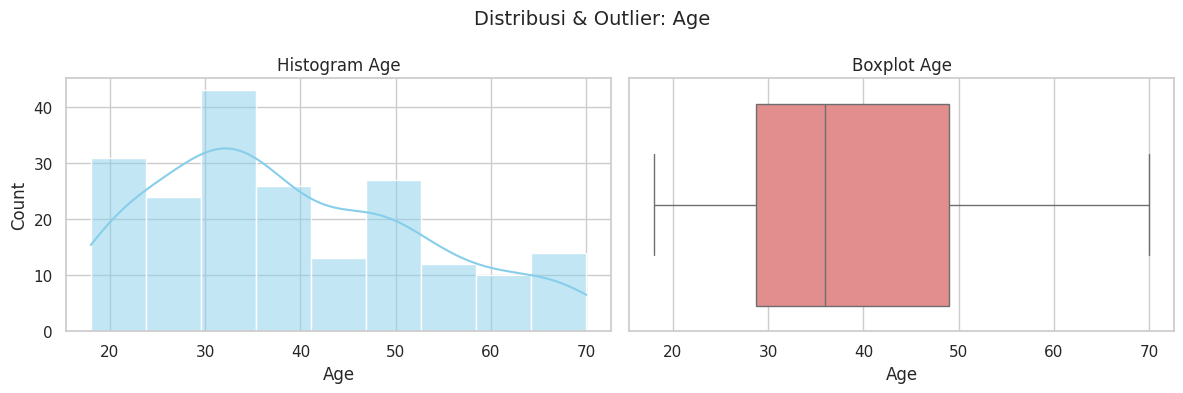

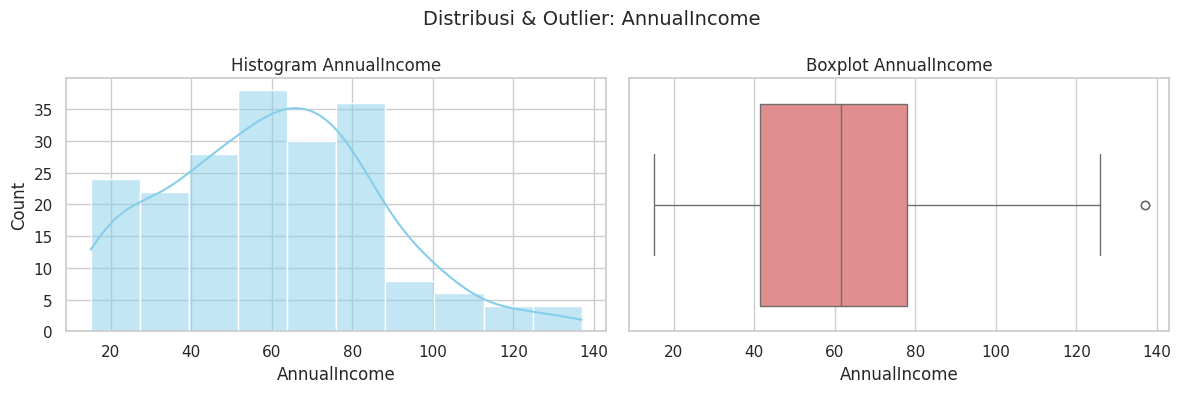

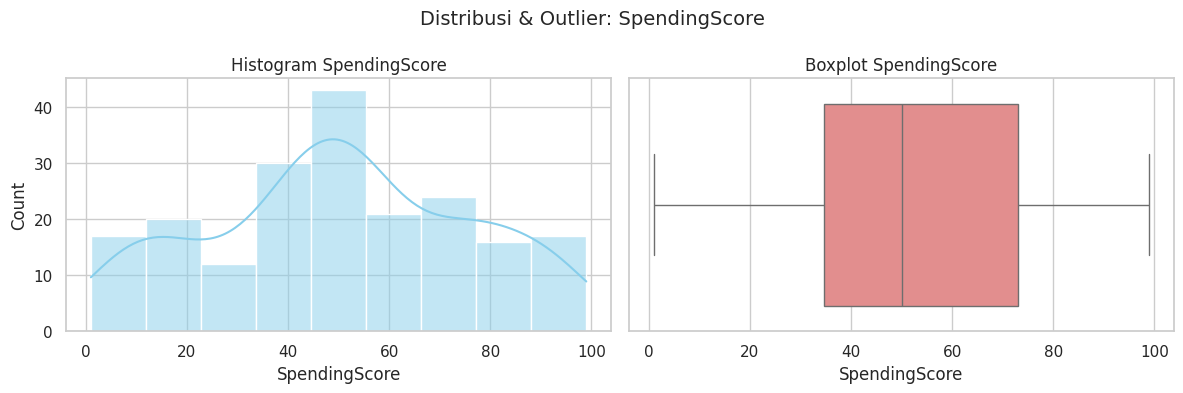

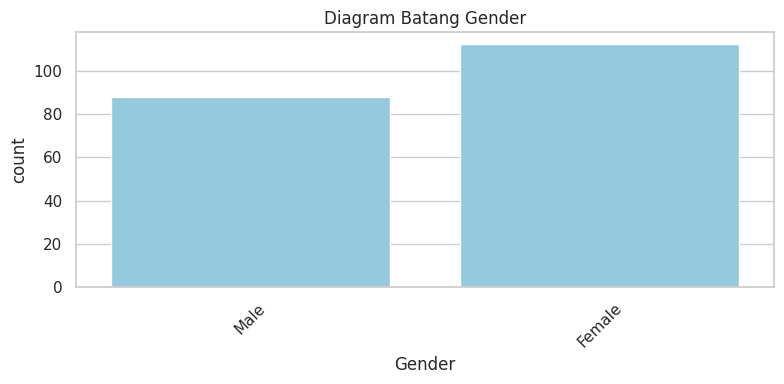

In [317]:
numerical_cols, categorical_cols = get_numerical_categorical_columns(df_clean, exclude_numeric_col=['CustomerID'])

plot_numerical_and_categorical(df_clean, numerical_cols, categorical_cols)

✓ Kolom 'Age': tidak ada outlier yang dihapus.
Kolom 'AnnualIncome': 2 outlier dihapus.
✓ Kolom 'SpendingScore': tidak ada outlier yang dihapus.


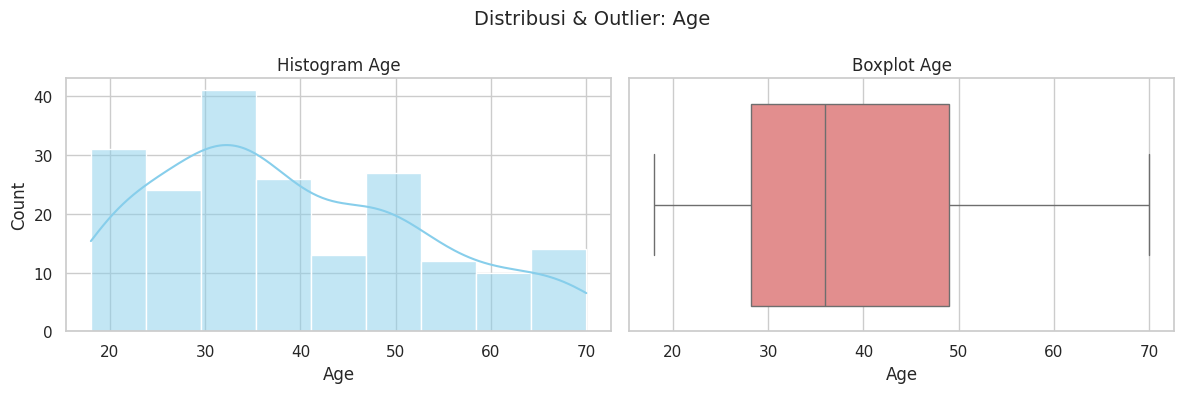

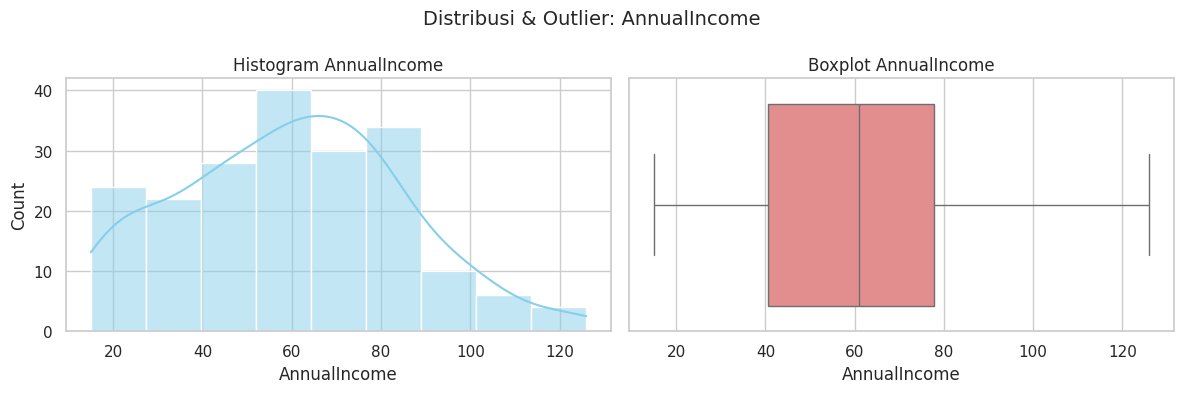

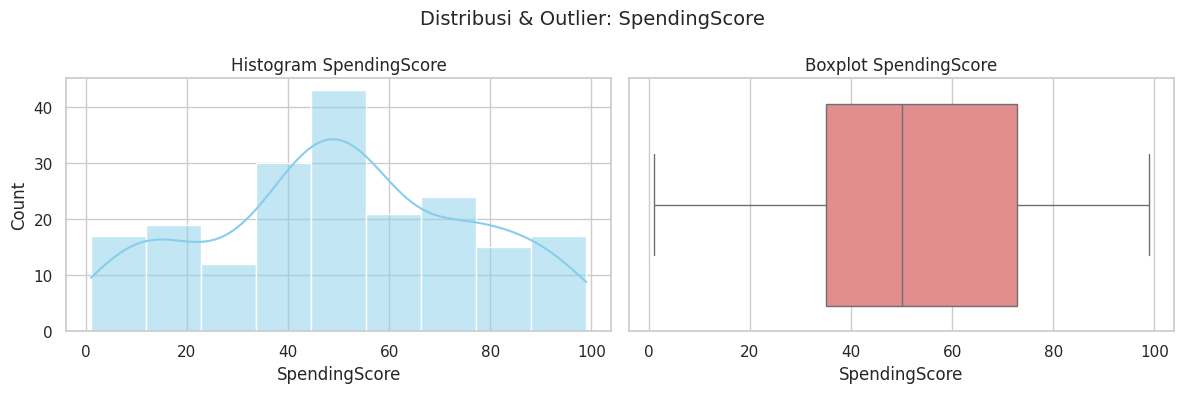

In [318]:
df_clean = remove_outliers_iqr(df_clean, numerical_cols)

plot_numerical_and_categorical(df_clean, numerical_cols)

#### Dataset 2

Kolom Numerikal: ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CHO', 'FAF', 'TUE']
Kolom Kategorikal: ['Gender', 'familyhistory', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS']


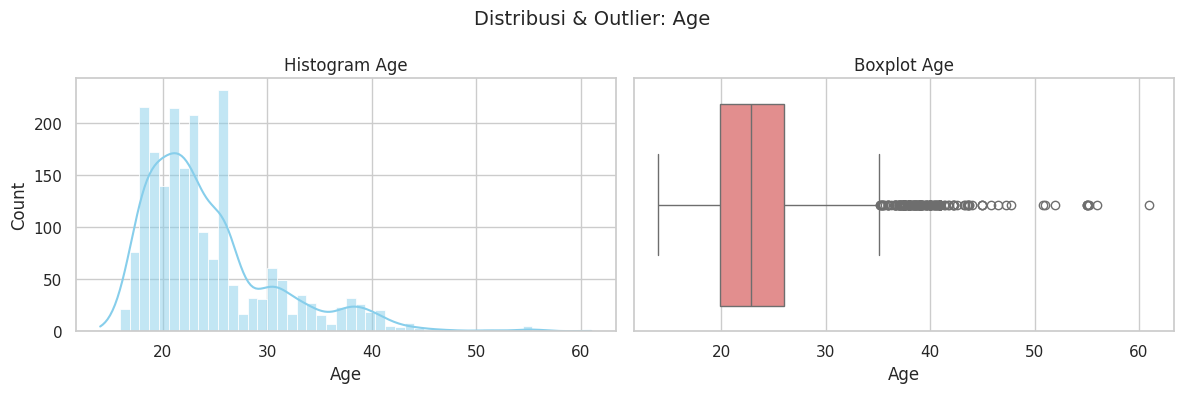

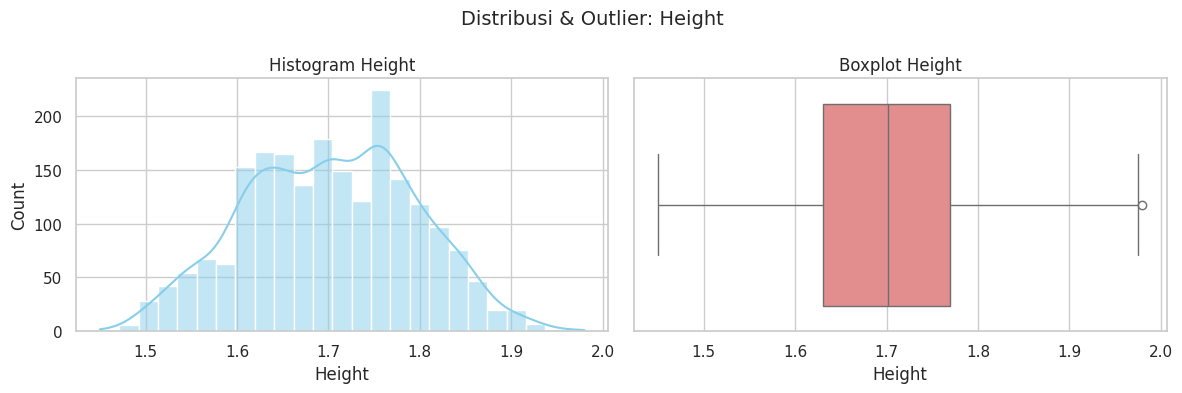

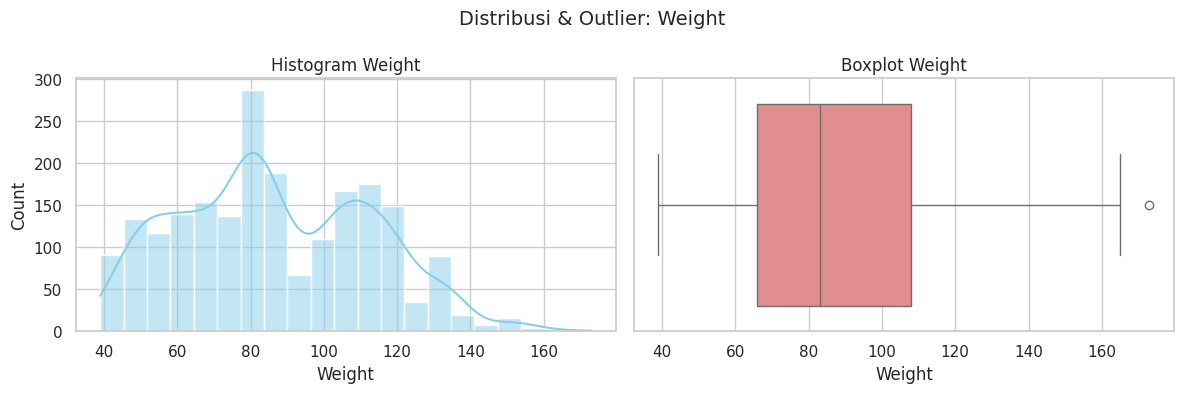

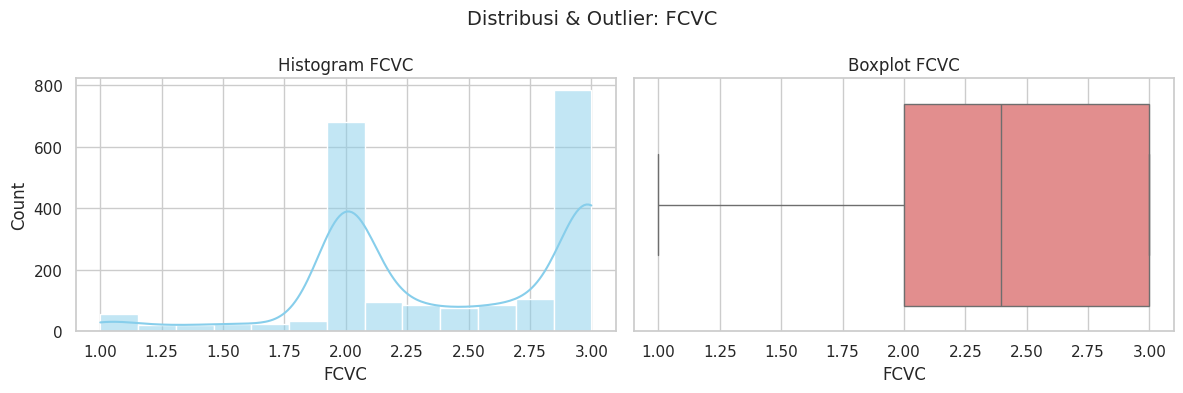

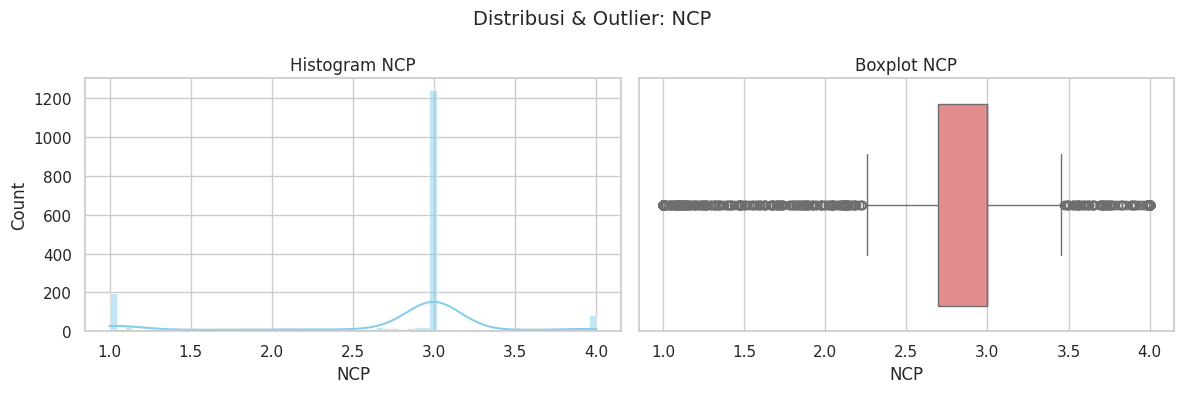

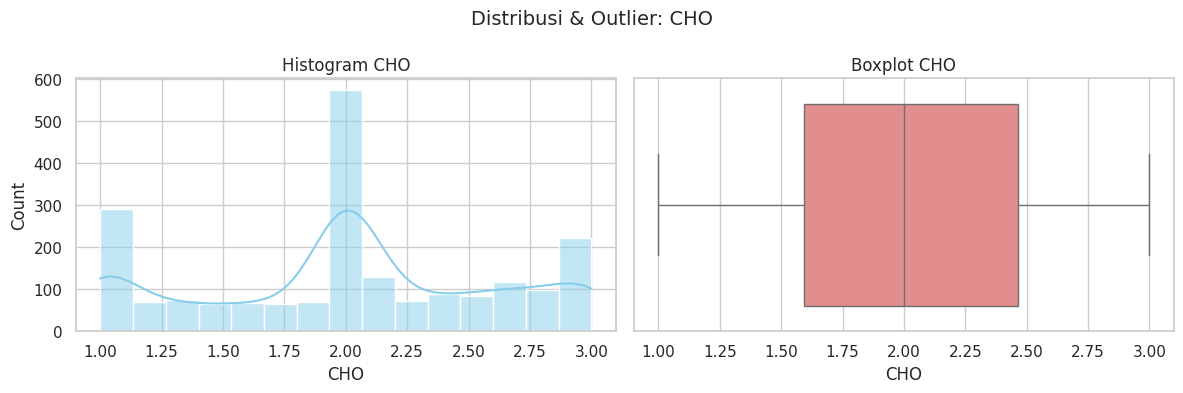

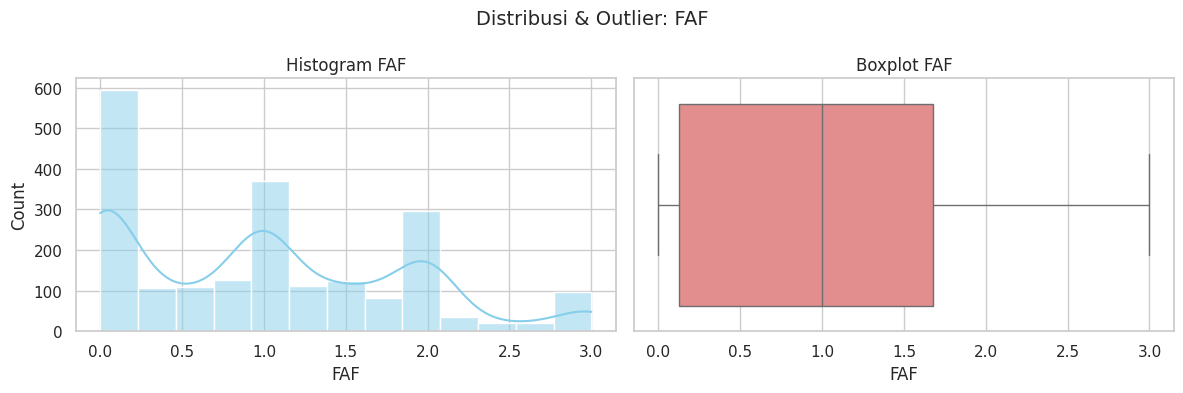

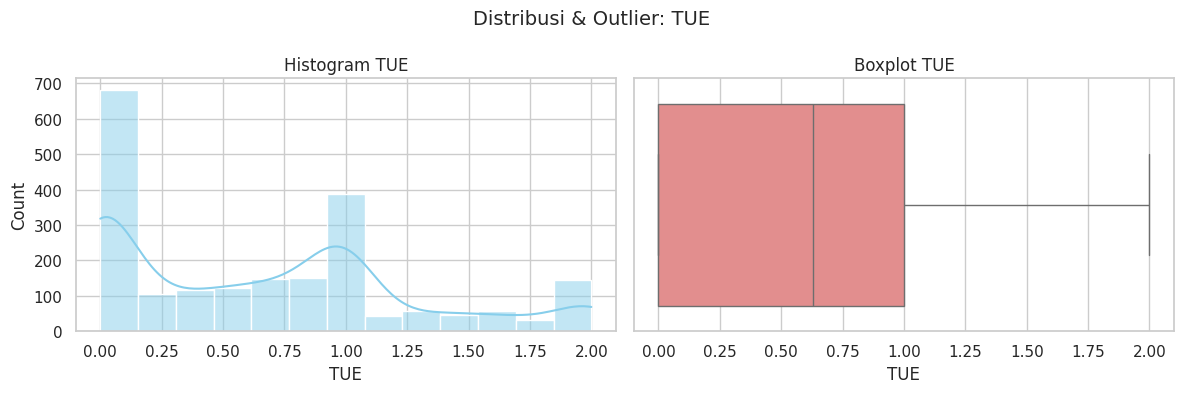

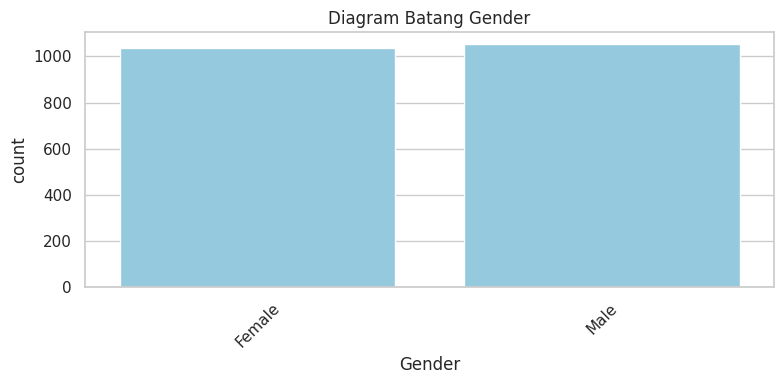

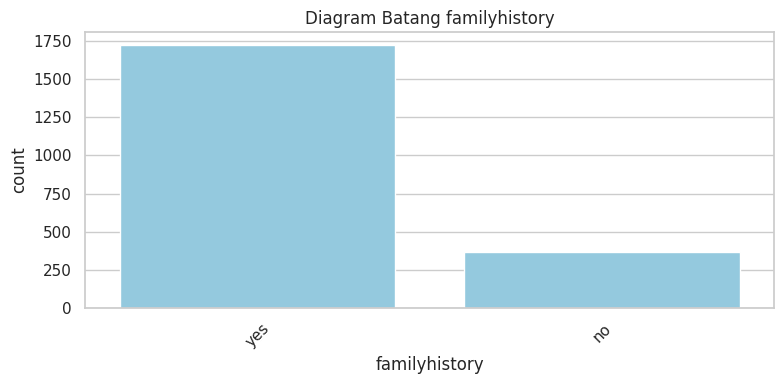

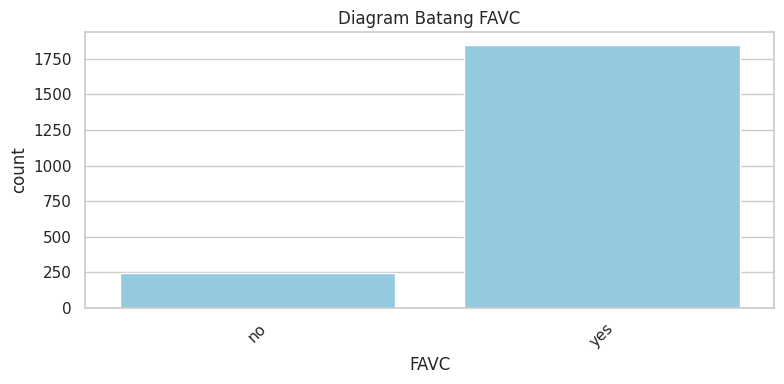

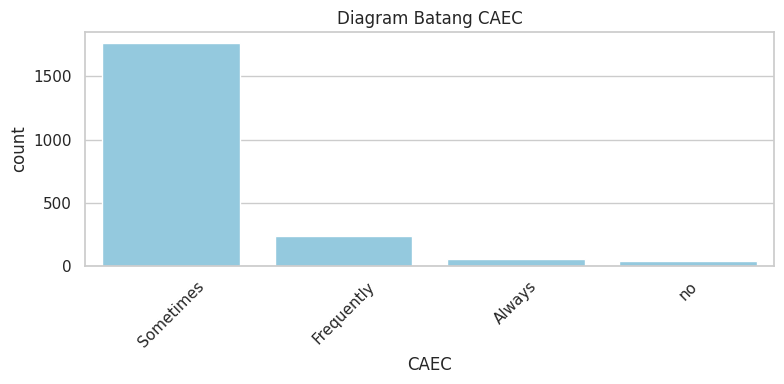

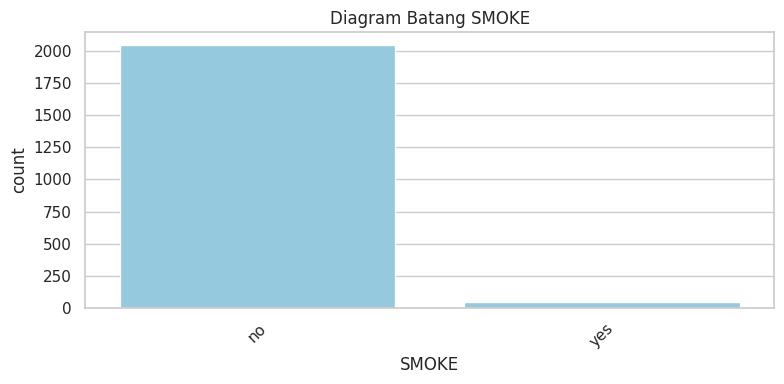

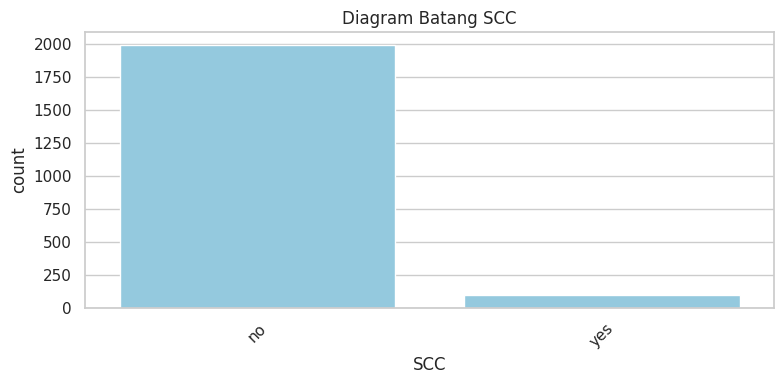

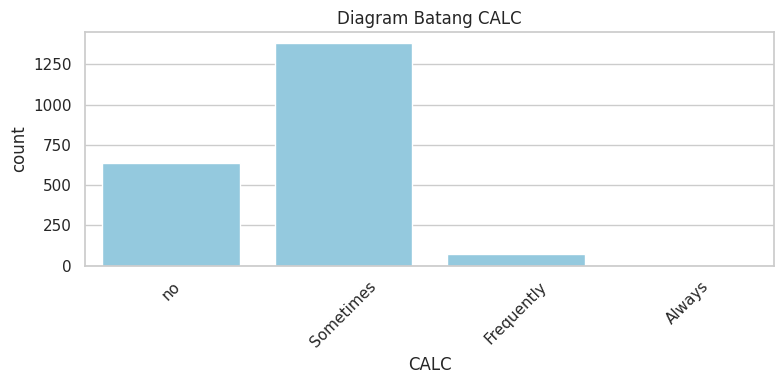

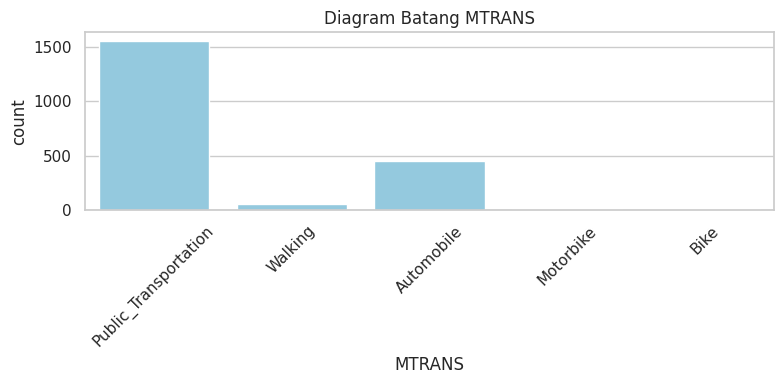

In [319]:
df2_numerical_cols, df2_categorical_cols = get_numerical_categorical_columns(df2_clean, exclude_categorical_col=['Obesity'])

plot_numerical_and_categorical(df2_clean, df2_numerical_cols, df2_categorical_cols)

Kolom 'Age': 167 outlier dihapus.
Kolom 'Height': 1 outlier dihapus.
✓ Kolom 'Weight': tidak ada outlier yang dihapus.
✓ Kolom 'FCVC': tidak ada outlier yang dihapus.
✓ Kolom 'CHO': tidak ada outlier yang dihapus.
✓ Kolom 'FAF': tidak ada outlier yang dihapus.
✓ Kolom 'TUE': tidak ada outlier yang dihapus.


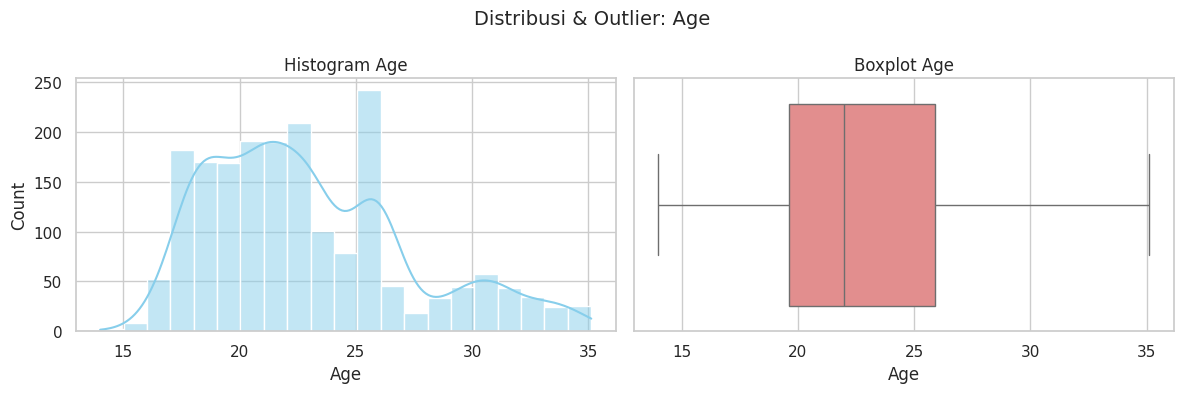

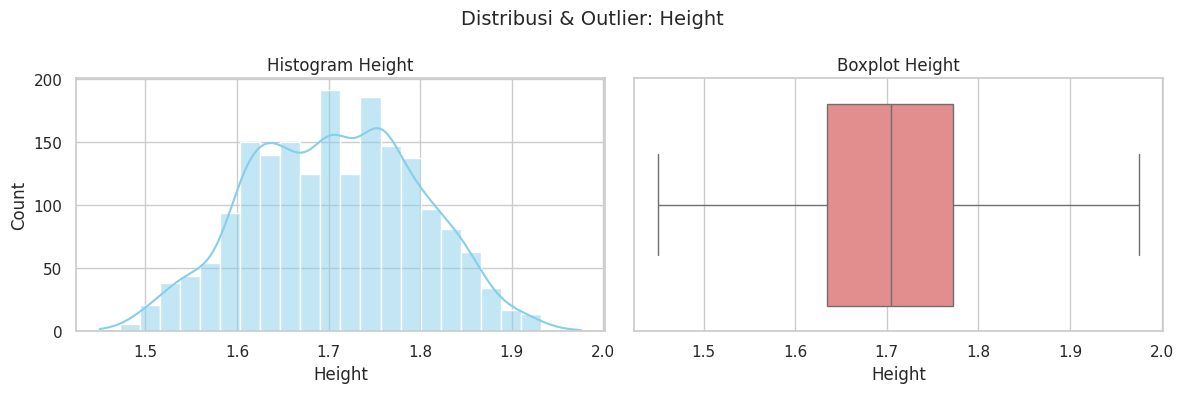

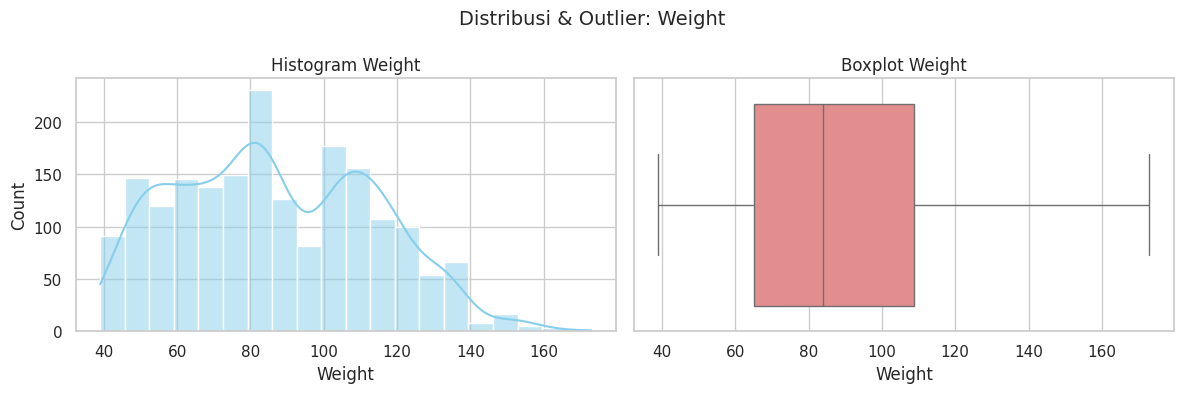

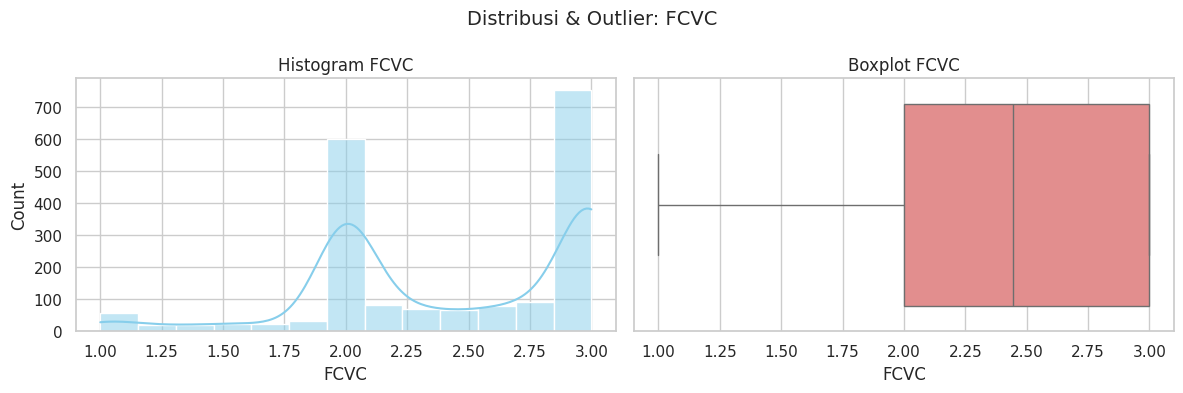

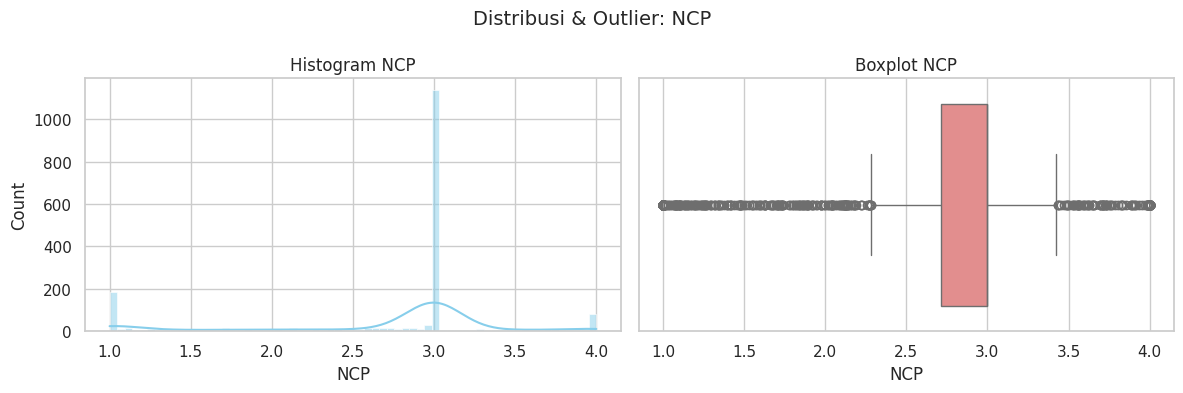

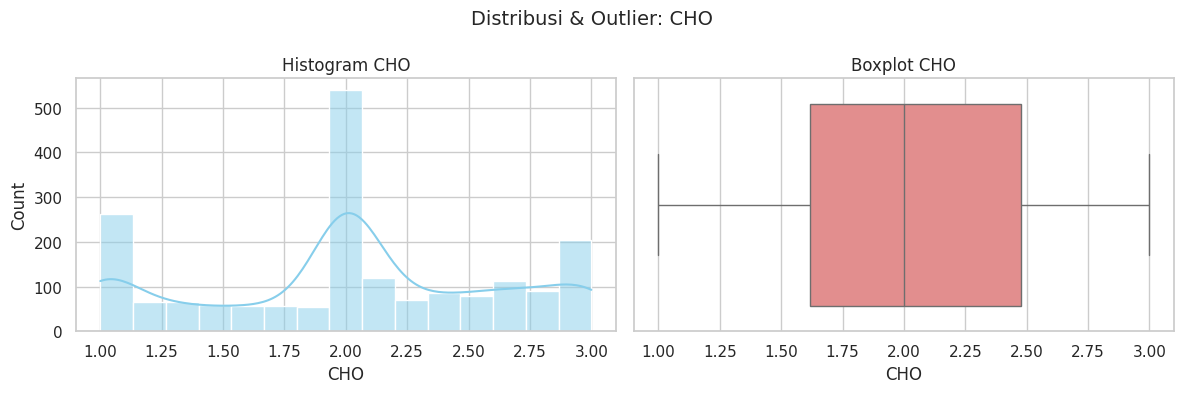

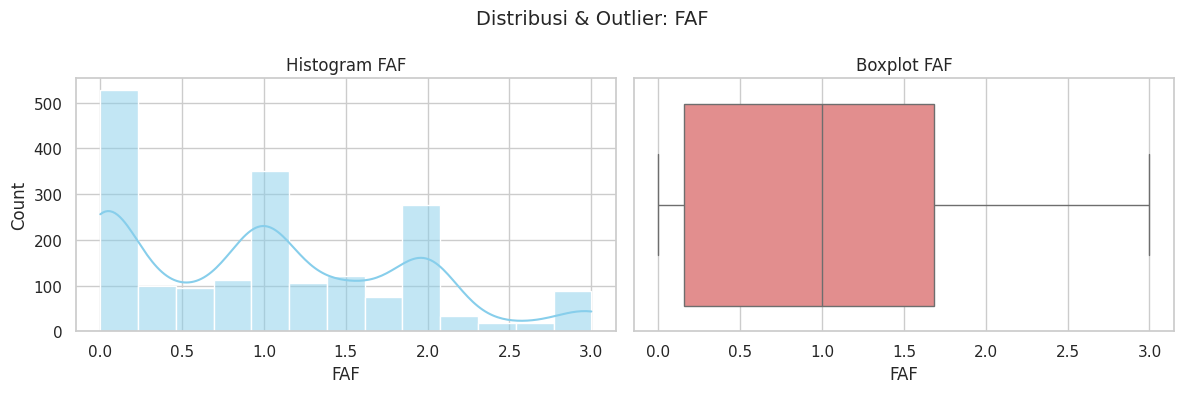

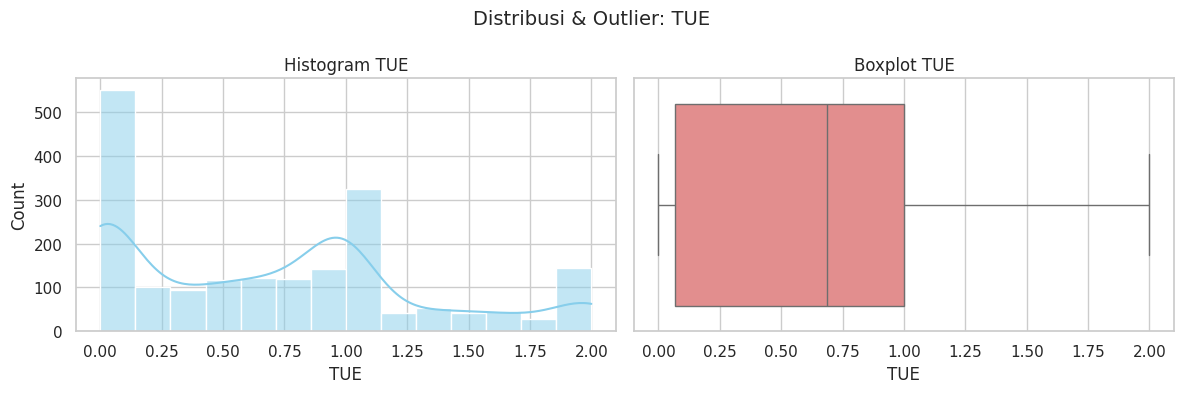

In [320]:
df2_clean = remove_outliers_iqr(df2_clean, df2_numerical_cols, exclude_columns=['NCP'])

plot_numerical_and_categorical(df2_clean, df2_numerical_cols)

#### Dataset 3

Kolom Numerikal: ['temperature', 'pressure', 'vibration', 'humidity']
Kolom Kategorikal: ['equipment', 'location']


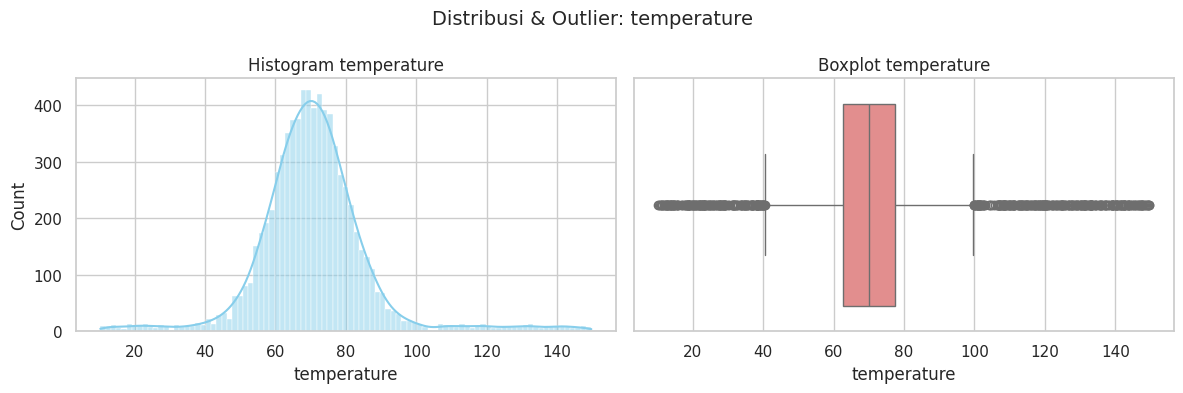

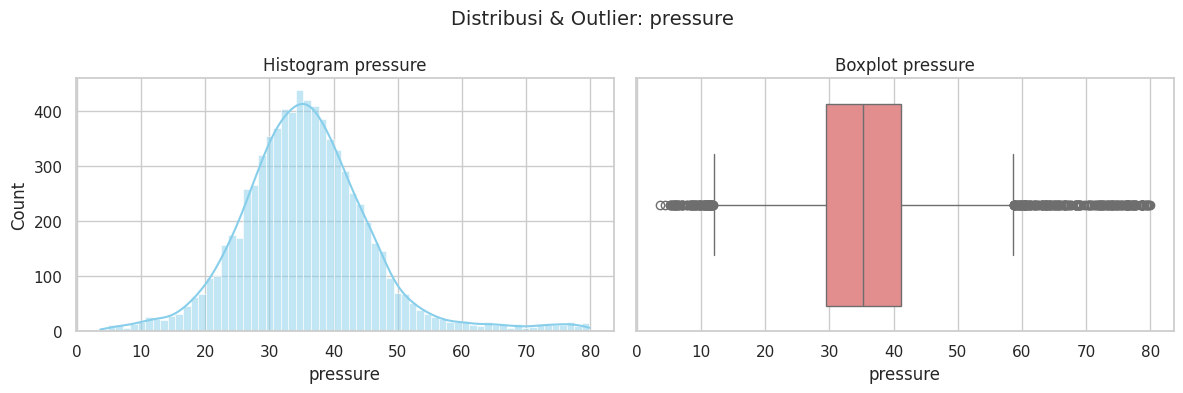

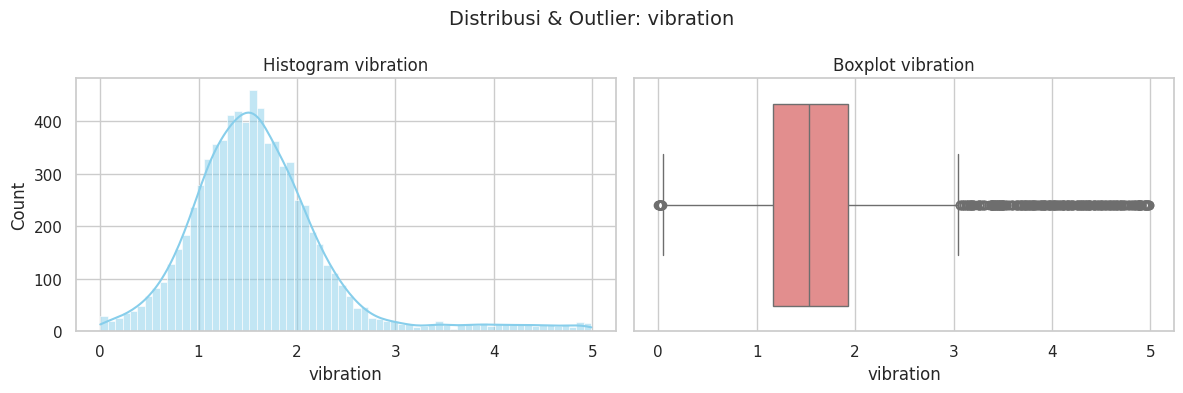

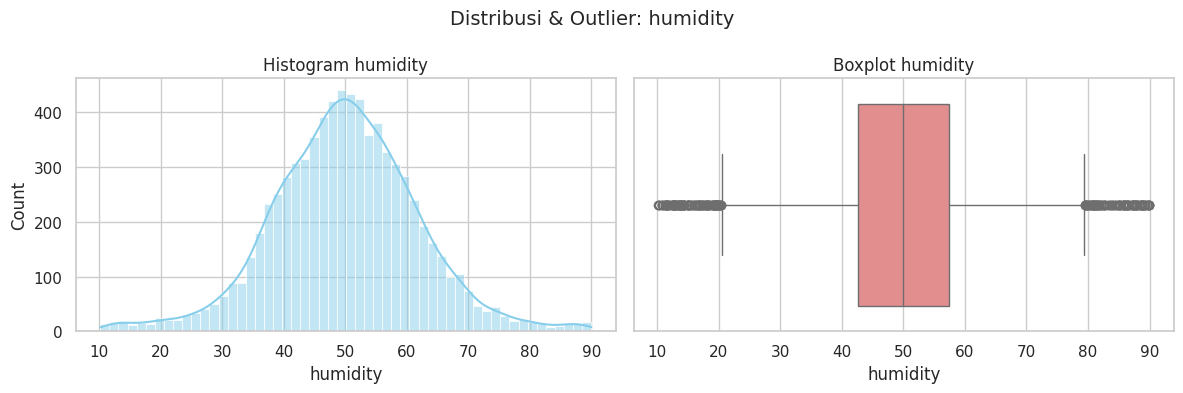

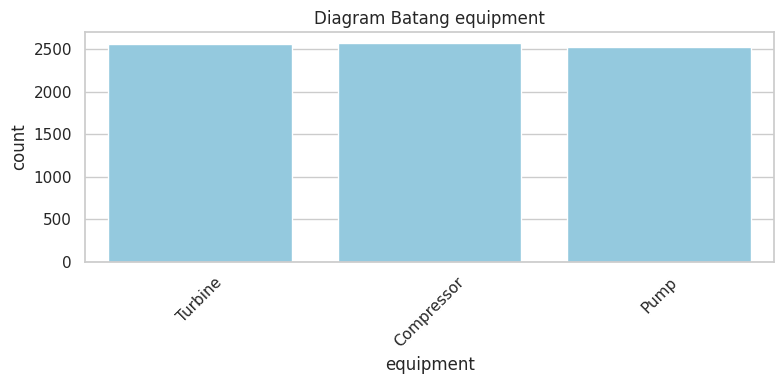

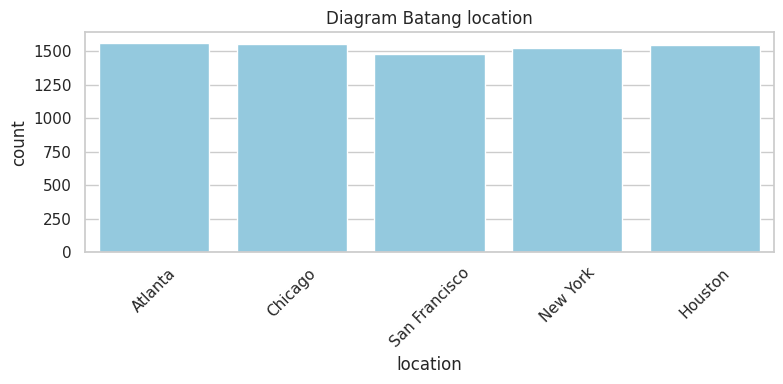

In [321]:
df3_numerical_cols, df3_categorical_cols = get_numerical_categorical_columns(df3_clean, exclude_numeric_col=['faulty'])

plot_numerical_and_categorical(df3_clean, df3_numerical_cols, df3_categorical_cols)

Kolom 'temperature': 462 outlier dihapus.
Kolom 'pressure': 166 outlier dihapus.
Kolom 'vibration': 124 outlier dihapus.
Kolom 'humidity': 60 outlier dihapus.


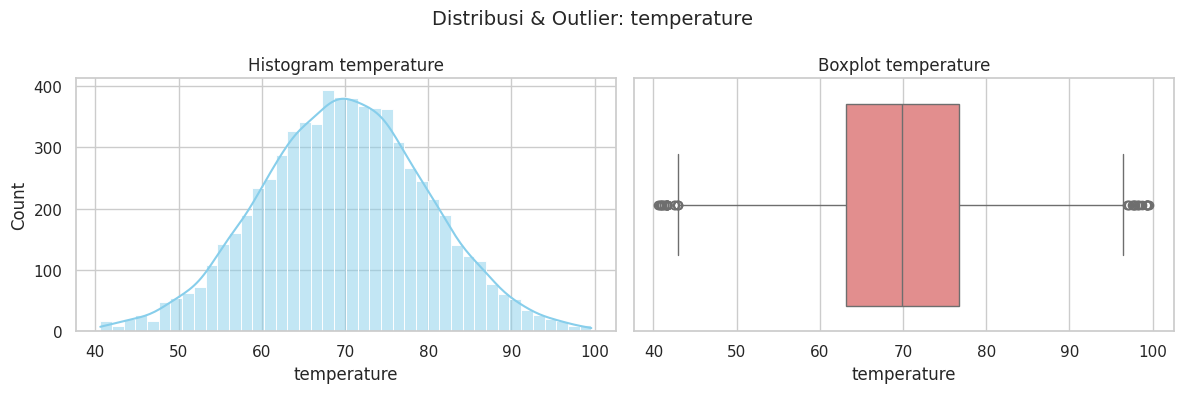

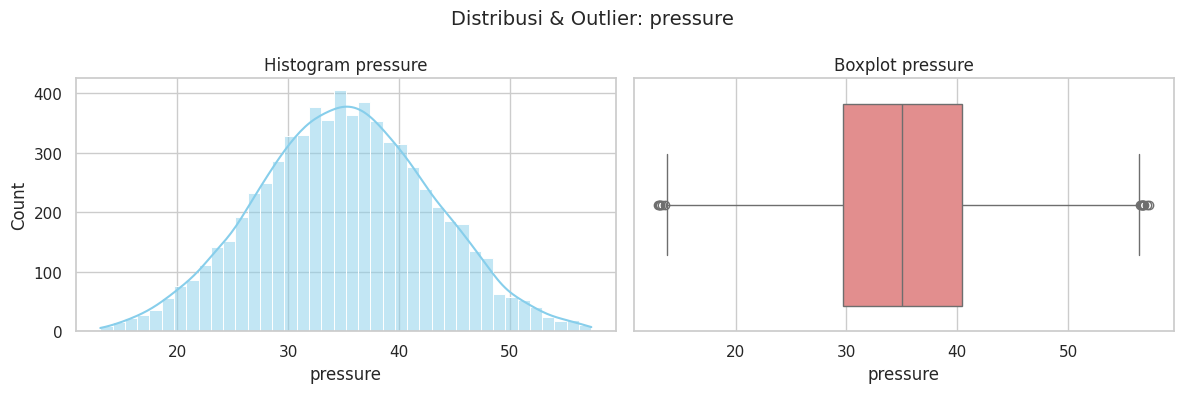

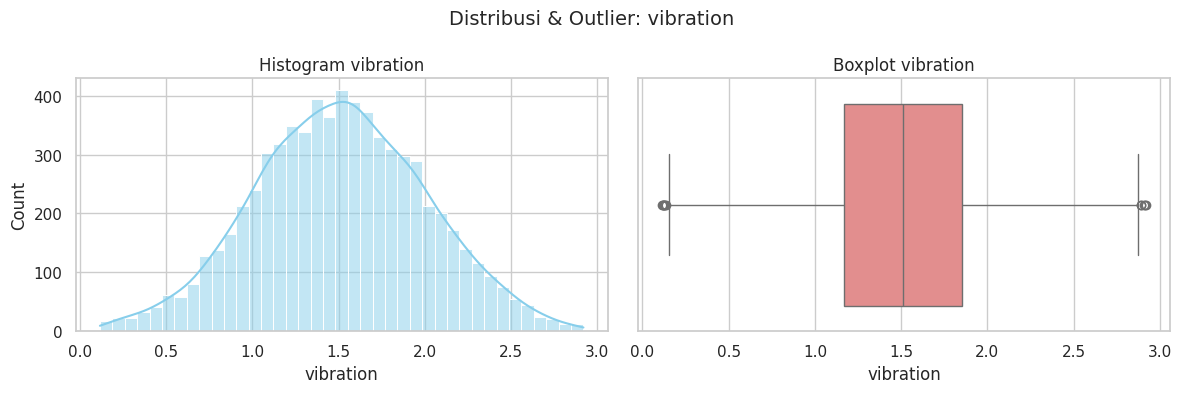

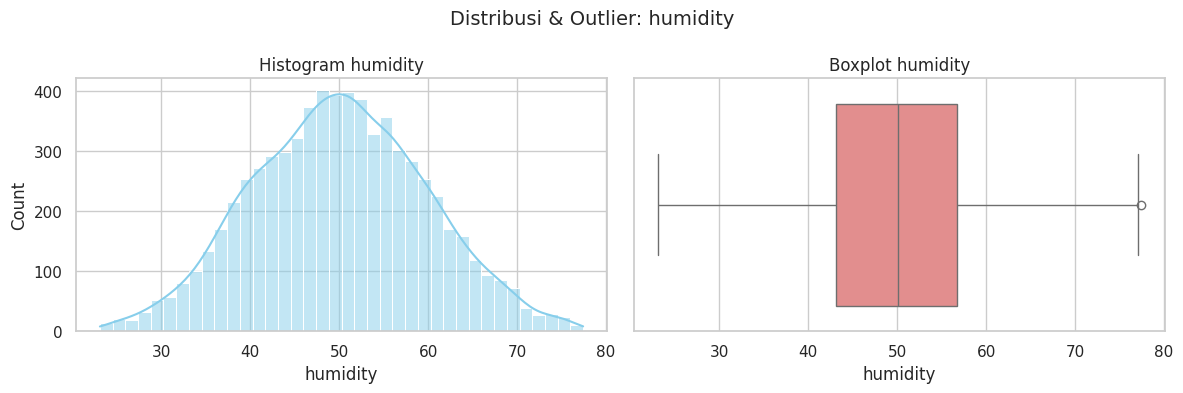

In [322]:
df3_clean = remove_outliers_iqr(df3_clean, df3_numerical_cols)

plot_numerical_and_categorical(df3_clean, df3_numerical_cols)

## Feature Selection & Scaling

### Memilih Kolom

#### Dataset 1

In [323]:
df_clean.columns

Index(['CustomerID', 'Gender', 'Age', 'AnnualIncome', 'SpendingScore'], dtype='object')

In [324]:
df_clean = df_clean.drop(columns=['CustomerID'])

df_clean.columns

Index(['Gender', 'Age', 'AnnualIncome', 'SpendingScore'], dtype='object')

#### Dataset 2

In [325]:
df2_clean.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'familyhistory', 'FAVC', 'FCVC',
       'NCP', 'CAEC', 'SMOKE', 'CHO', 'SCC', 'FAF', 'TUE', 'CALC', 'MTRANS',
       'Obesity'],
      dtype='object')

In [326]:
df2_clean = df2_clean.drop(columns=['Obesity'])

df2_clean.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'familyhistory', 'FAVC', 'FCVC',
       'NCP', 'CAEC', 'SMOKE', 'CHO', 'SCC', 'FAF', 'TUE', 'CALC', 'MTRANS'],
      dtype='object')

#### Dataset 3

In [327]:
df3_clean.columns

Index(['temperature', 'pressure', 'vibration', 'humidity', 'equipment',
       'location', 'faulty'],
      dtype='object')

In [328]:
df3_clean = df3_clean.drop(columns=['faulty'])

df3_clean.columns

Index(['temperature', 'pressure', 'vibration', 'humidity', 'equipment',
       'location'],
      dtype='object')

### Lakukan Label Encoding Untuk Kolom Binary Categorical

In [329]:
def label_encode(df: pd.DataFrame, columns: list) -> pd.DataFrame:
    """
    Melakukan label encoding untuk daftar kolom kategorikal.
    Encoding akan bersifat manual berdasarkan urutan unik yang muncul pertama.

    Parameters
    -----------
    df : DataFrame
        DataFrame input (tidak akan dimodifikasi secara in-place).
    columns : list
        List nama kolom kategorikal yang ingin di-encode.

    Returns
    --------
    DataFrame baru dengan kolom tambahan hasil encoding.
    """
    if not columns:
        print("⚠️ Tidak ada kolom yang diberikan untuk label encoding.")
        return df.copy()

    df_encoded = df.copy()
    for col in columns:
        unique_vals = df_encoded[col].dropna().unique()

        mapping = {val: idx for idx, val in enumerate(unique_vals)}

        df_encoded[col + '_Encoded'] = df_encoded[col].map(mapping)
        print(f"Mapping untuk kolom '{col}': {mapping}")

    return df_encoded

#### Dataset 1

In [330]:
lbl_encode_cols = ["Gender"]

df_encoded = df_clean.copy()
df_encoded = label_encode(df_clean, lbl_encode_cols)

Mapping untuk kolom 'Gender': {'Male': 0, 'Female': 1}


In [331]:
df_encoded.head()

Gender  Age  AnnualIncome  SpendingScore  Gender_Encoded
0    Male   19            15             39               0
1    Male   21            15             81               0
2  Female   20            16              6               1
3  Female   23            16             77               1
4  Female   31            17             40               1

#### Dataset 2

In [332]:
df2_lbl_encode_cols = ["SCC", "SMOKE", "FAVC", "familyhistory", "Gender"]

df2_encoded = df2_clean.copy()
df2_encoded = label_encode(df2_clean, df2_lbl_encode_cols)

Mapping untuk kolom 'SCC': {'no': 0, 'yes': 1}
Mapping untuk kolom 'SMOKE': {'no': 0, 'yes': 1}
Mapping untuk kolom 'FAVC': {'no': 0, 'yes': 1}
Mapping untuk kolom 'familyhistory': {'yes': 0, 'no': 1}
Mapping untuk kolom 'Gender': {'Female': 0, 'Male': 1}


In [333]:
df2_encoded.head()

Gender   Age  Height  Weight familyhistory FAVC  FCVC  NCP       CAEC  \
0  Female  21.0    1.62    64.0           yes   no   2.0  3.0  Sometimes   
1  Female  21.0    1.52    56.0           yes   no   3.0  3.0  Sometimes   
2    Male  23.0    1.80    77.0           yes   no   2.0  3.0  Sometimes   
3    Male  27.0    1.80    87.0            no   no   3.0  3.0  Sometimes   
4    Male  22.0    1.78    89.8            no   no   2.0  1.0  Sometimes   

  SMOKE  ...  SCC  FAF  TUE        CALC                 MTRANS SCC_Encoded  \
0    no  ...   no  0.0  1.0          no  Public_Transportation           0   
1   yes  ...  yes  3.0  0.0   Sometimes  Public_Transportation           1   
2    no  ...   no  2.0  1.0  Frequently  Public_Transportation           0   
3    no  ...   no  2.0  0.0  Frequently                Walking           0   
4    no  ...   no  0.0  0.0   Sometimes  Public_Transportation           0   

   SMOKE_Encoded  FAVC_Encoded  familyhistory_Encoded  Gender_Encoded  
0              0             0                      0               0  
1              1             0                      0               0  
2              0             0                      0               1  
3              0             0                      1               1  
4              0             0                      1               1  

[5 rows x 21 columns]

#### Dataset 3

In [334]:
df3_lbl_encode_cols = ['equipment', 'location']

df3_encoded = df3_clean.copy()
df3_encoded = label_encode(df3_clean, df3_lbl_encode_cols)

Mapping untuk kolom 'equipment': {'Turbine': 0, 'Compressor': 1, 'Pump': 2}
Mapping untuk kolom 'location': {'Atlanta': 0, 'Chicago': 1, 'San Francisco': 2, 'New York': 3, 'Houston': 4}


In [335]:
df3_encoded.head()

temperature   pressure  vibration   humidity   equipment       location  \
0    58.180180  25.029278   0.606516  45.694907     Turbine        Atlanta   
1    75.740712  22.954018   2.338095  41.867407  Compressor        Chicago   
2    71.358594  27.276830   1.389198  58.954409     Turbine  San Francisco   
3    71.616985  32.242921   1.770690  40.565138        Pump        Atlanta   
4    66.506832  45.197471   0.345398  43.253795        Pump       New York   

   equipment_Encoded  location_Encoded  
0                  0                 0  
1                  1                 1  
2                  0                 2  
3                  2                 0  
4                  2                 3

### Lakukan Frequency Encoding Untuk Kolom Categorical

In [336]:
def frequency_encode(df: pd.DataFrame, columns: list) -> pd.DataFrame:
    """
    Melakukan frequency encoding untuk beberapa kolom kategorikal.

    Parameters
    ----------
    df : DataFrame
        DataFrame input (tidak akan dimodifikasi secara in-place).
    columns : list
        List nama kolom kategorikal yang ingin di-encode.

    Returns
    ----------
    DataFrame baru dengan kolom tambahan hasil frequency encoding.
    """
    if not columns:
        print("⚠️ Tidak ada kolom yang diberikan untuk frequency encoding.")
        return df.copy()

    df_encoded = df.copy()
    for col in columns:
        freq_map = df_encoded[col].value_counts()
        df_encoded[col + '_FreqEncoded'] = df_encoded[col].map(freq_map)
        print(f"Top 5 Frequency Encoding untuk '{col}':\n{freq_map.head()}\n")
    return df_encoded

#### Dataset 1

In [337]:
freq_encode_cols = []

df_encoded = frequency_encode(df_encoded, freq_encode_cols)

⚠️ Tidak ada kolom yang diberikan untuk frequency encoding.


#### Dataset 2

In [338]:
df2_freq_encode_cols = ["CAEC", "CALC", "MTRANS"]

df2_encoded = frequency_encode(df2_encoded, df2_freq_encode_cols)

Top 5 Frequency Encoding untuk 'CAEC':
CAEC
Sometimes     1607
Frequently     226
Always          49
no              37
Name: count, dtype: int64

Top 5 Frequency Encoding untuk 'CALC':
CALC
Sometimes     1286
no             577
Frequently      55
Always           1
Name: count, dtype: int64

Top 5 Frequency Encoding untuk 'MTRANS':
MTRANS
Public_Transportation    1549
Automobile                301
Walking                    54
Motorbike                   9
Bike                        6
Name: count, dtype: int64



In [339]:
df2_encoded.head()

Gender   Age  Height  Weight familyhistory FAVC  FCVC  NCP       CAEC  \
0  Female  21.0    1.62    64.0           yes   no   2.0  3.0  Sometimes   
1  Female  21.0    1.52    56.0           yes   no   3.0  3.0  Sometimes   
2    Male  23.0    1.80    77.0           yes   no   2.0  3.0  Sometimes   
3    Male  27.0    1.80    87.0            no   no   3.0  3.0  Sometimes   
4    Male  22.0    1.78    89.8            no   no   2.0  1.0  Sometimes   

  SMOKE  ...        CALC                 MTRANS  SCC_Encoded  SMOKE_Encoded  \
0    no  ...          no  Public_Transportation            0              0   
1   yes  ...   Sometimes  Public_Transportation            1              1   
2    no  ...  Frequently  Public_Transportation            0              0   
3    no  ...  Frequently                Walking            0              0   
4    no  ...   Sometimes  Public_Transportation            0              0   

  FAVC_Encoded familyhistory_Encoded  Gender_Encoded  CAEC_FreqEncoded  \
0            0                     0               0              1607   
1            0                     0               0              1607   
2            0                     0               1              1607   
3            0                     1               1              1607   
4            0                     1               1              1607   

   CALC_FreqEncoded  MTRANS_FreqEncoded  
0               577                1549  
1              1286                1549  
2                55                1549  
3                55                  54  
4              1286                1549  

[5 rows x 24 columns]

#### Dataset 3

In [340]:
df3_freq_encode_cols = []

df3_encoded = frequency_encode(df3_encoded, df3_freq_encode_cols)

⚠️ Tidak ada kolom yang diberikan untuk frequency encoding.


### drop kolom kategori karena sudah diencode

#### Dataset 1

In [341]:
df_encoded = df_encoded.drop(columns=categorical_cols)

df_encoded.head()

Age  AnnualIncome  SpendingScore  Gender_Encoded
0   19            15             39               0
1   21            15             81               0
2   20            16              6               1
3   23            16             77               1
4   31            17             40               1

#### Dataset 2

In [342]:
df2_encoded = df2_encoded.drop(columns=df2_categorical_cols)

df2_encoded.head()

Age  Height  Weight  FCVC  NCP  CHO  FAF  TUE  SCC_Encoded  SMOKE_Encoded  \
0  21.0    1.62    64.0   2.0  3.0  2.0  0.0  1.0            0              0   
1  21.0    1.52    56.0   3.0  3.0  3.0  3.0  0.0            1              1   
2  23.0    1.80    77.0   2.0  3.0  2.0  2.0  1.0            0              0   
3  27.0    1.80    87.0   3.0  3.0  2.0  2.0  0.0            0              0   
4  22.0    1.78    89.8   2.0  1.0  2.0  0.0  0.0            0              0   

   FAVC_Encoded  familyhistory_Encoded  Gender_Encoded  CAEC_FreqEncoded  \
0             0                      0               0              1607   
1             0                      0               0              1607   
2             0                      0               1              1607   
3             0                      1               1              1607   
4             0                      1               1              1607   

   CALC_FreqEncoded  MTRANS_FreqEncoded  
0               577                1549  
1              1286                1549  
2                55                1549  
3                55                  54  
4              1286                1549

#### Dataset 3

In [343]:
df3_encoded = df3_encoded.drop(columns=df3_categorical_cols)

df3_encoded.head()

temperature   pressure  vibration   humidity  equipment_Encoded  \
0    58.180180  25.029278   0.606516  45.694907                  0   
1    75.740712  22.954018   2.338095  41.867407                  1   
2    71.358594  27.276830   1.389198  58.954409                  0   
3    71.616985  32.242921   1.770690  40.565138                  2   
4    66.506832  45.197471   0.345398  43.253795                  2   

   location_Encoded  
0                 0  
1                 1  
2                 2  
3                 0  
4                 3

### lakukan data scalling (normalisasi)

In [344]:
from sklearn.preprocessing import StandardScaler

In [345]:
scaler = StandardScaler()

#### Dataset 1

In [346]:
scaled_data = scaler.fit_transform(df_encoded[df_encoded.columns])
df_scaled = pd.DataFrame(scaled_data, columns=df_encoded.columns)

display(df_scaled.info())
display(df_scaled.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198 entries, 0 to 197
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             198 non-null    float64
 1   AnnualIncome    198 non-null    float64
 2   SpendingScore   198 non-null    float64
 3   Gender_Encoded  198 non-null    float64
dtypes: float64(4)
memory usage: 6.3 KB


None

Age  AnnualIncome  SpendingScore  Gender_Encoded
0 -1.425414     -1.779171      -0.435989       -1.141195
1 -1.282367     -1.779171       1.199413       -1.141195
2 -1.353890     -1.739447      -1.720949        0.876275
3 -1.139319     -1.739447       1.043661        0.876275
4 -0.567131     -1.699723      -0.397051        0.876275

#### Dataset 2

In [347]:
df2_scaled_data = scaler.fit_transform(df2_encoded[df2_encoded.columns])
df2_scaled = pd.DataFrame(df2_scaled_data, columns=df2_encoded.columns)

display(df2_scaled.info())
display(df2_scaled.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1919 entries, 0 to 1918
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    1919 non-null   float64
 1   Height                 1919 non-null   float64
 2   Weight                 1919 non-null   float64
 3   FCVC                   1919 non-null   float64
 4   NCP                    1919 non-null   float64
 5   CHO                    1919 non-null   float64
 6   FAF                    1919 non-null   float64
 7   TUE                    1919 non-null   float64
 8   SCC_Encoded            1919 non-null   float64
 9   SMOKE_Encoded          1919 non-null   float64
 10  FAVC_Encoded           1919 non-null   float64
 11  familyhistory_Encoded  1919 non-null   float64
 12  Gender_Encoded         1919 non-null   float64
 13  CAEC_FreqEncoded       1919 non-null   float64
 14  CALC_FreqEncoded       1919 non-null   float64
 15  MTRA

None

Age    Height    Weight      FCVC       NCP       CHO       FAF  \
0 -0.457231 -0.936264 -0.853138 -0.786149  0.379223 -0.024439 -1.210696   
1 -0.457231 -2.022892 -1.150978  1.048250  0.379223  1.625266  2.323761   
2  0.004765  1.019667 -0.369148 -0.786149  0.379223 -0.024439  1.145609   
3  0.928757  1.019667  0.003151  1.048250  0.379223 -0.024439  1.145609   
4 -0.226233  0.802342  0.107395 -0.786149 -2.240408 -0.024439 -1.210696   

        TUE  SCC_Encoded  SMOKE_Encoded  FAVC_Encoded  familyhistory_Encoded  \
0  0.491606    -0.226951      -0.144030     -2.736997              -0.473955   
1 -1.155703     4.406233       6.942991     -2.736997              -0.473955   
2  0.491606    -0.226951      -0.144030     -2.736997              -0.473955   
3 -1.155703    -0.226951      -0.144030     -2.736997               2.109906   
4 -1.155703    -0.226951      -0.144030     -2.736997               2.109906   

   Gender_Encoded  CAEC_FreqEncoded  CALC_FreqEncoded  MTRANS_FreqEncoded  
0       -1.025869          0.439775         -1.259228            0.486928  
1       -1.025869          0.439775          0.682180            0.486928  
2        0.974784          0.439775         -2.688586            0.486928  
3        0.974784          0.439775         -2.688586           -2.426444  
4        0.974784          0.439775          0.682180            0.486928

#### Dataset 3

In [348]:
df3_scaled_data = scaler.fit_transform(df3_encoded[df3_encoded.columns])
df3_scaled = pd.DataFrame(df3_scaled_data, columns=df3_encoded.columns)

display(df3_scaled.info())
display(df3_scaled.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6860 entries, 0 to 6859
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   temperature        6860 non-null   float64
 1   pressure           6860 non-null   float64
 2   vibration          6860 non-null   float64
 3   humidity           6860 non-null   float64
 4   equipment_Encoded  6860 non-null   float64
 5   location_Encoded   6860 non-null   float64
dtypes: float64(6)
memory usage: 321.7 KB


None

temperature  pressure  vibration  humidity  equipment_Encoded  \
0    -1.171148 -1.284483  -1.813175 -0.446198          -1.222339   
1     0.583022 -1.549719   1.664687 -0.837447           0.002858   
2     0.145280 -0.997226  -0.241164  0.909197          -1.222339   
3     0.171092 -0.362517   0.525058 -0.970566           1.228054   
4    -0.339376  1.293185  -2.337629 -0.695730           1.228054   

   location_Encoded  
0         -1.396595  
1         -0.695025  
2          0.006545  
3         -1.396595  
4          0.708115

### menampilkan similarity matrix

In [349]:
from sklearn.metrics.pairwise import cosine_similarity

def plot_cosine_similarity(
    df_scaled: pd.DataFrame,
    title='Cosine Similarity Matrix antar Observasi',
    suffix: str = ""
) -> None:
    """
    Menghitung dan mem-plot cosine similarity antar observasi pada DataFrame.

    Parameters
    ----------
        df_scaled (pd.DataFrame): DataFrame yang sudah diskalakan (numerik).
        title (str): Judul plot heatmap.
        suffix (str): Suffix untuk nama file output (jika diperlukan).

    Returns
    -------
    None
    plot
    """
    # Hitung cosine similarity antar observasi (baris)
    similarity_matrix = cosine_similarity(df_scaled)

    # Ubah ke DataFrame agar bisa divisualisasikan
    similarity_df = pd.DataFrame(similarity_matrix,
                                 index=df_scaled.index,
                                 columns=df_scaled.index)

    # Plot heatmap
    plt.figure(figsize=(12, 10))
    sns.heatmap(similarity_df, cmap='viridis', square=True)
    plt.title(title + suffix)
    plt.xlabel('Observasi')
    plt.ylabel('Observasi')
    plt.tight_layout()
    plt.show()

#### Dataset 1

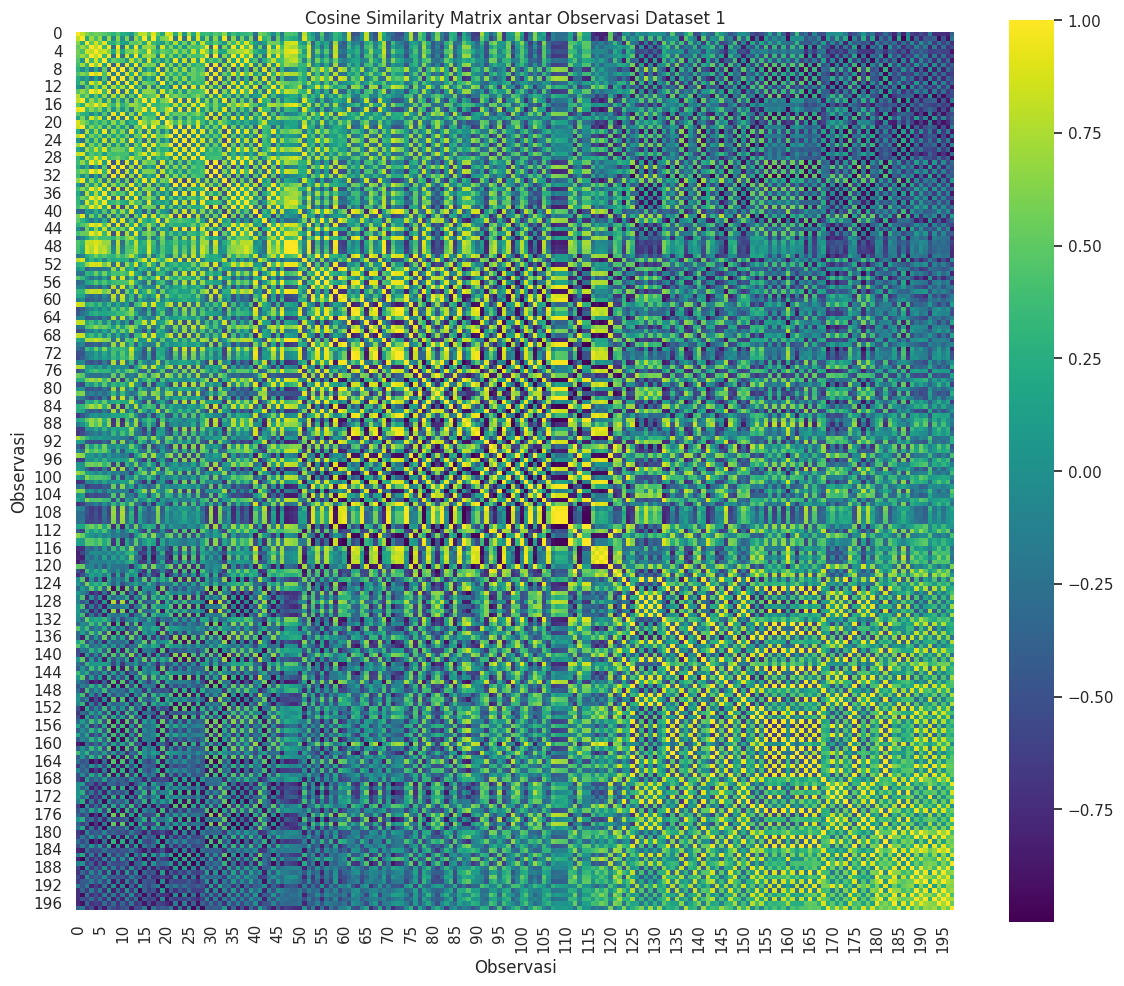

In [350]:
plot_cosine_similarity(df_scaled, suffix=" Dataset 1")

#### Dataset 2

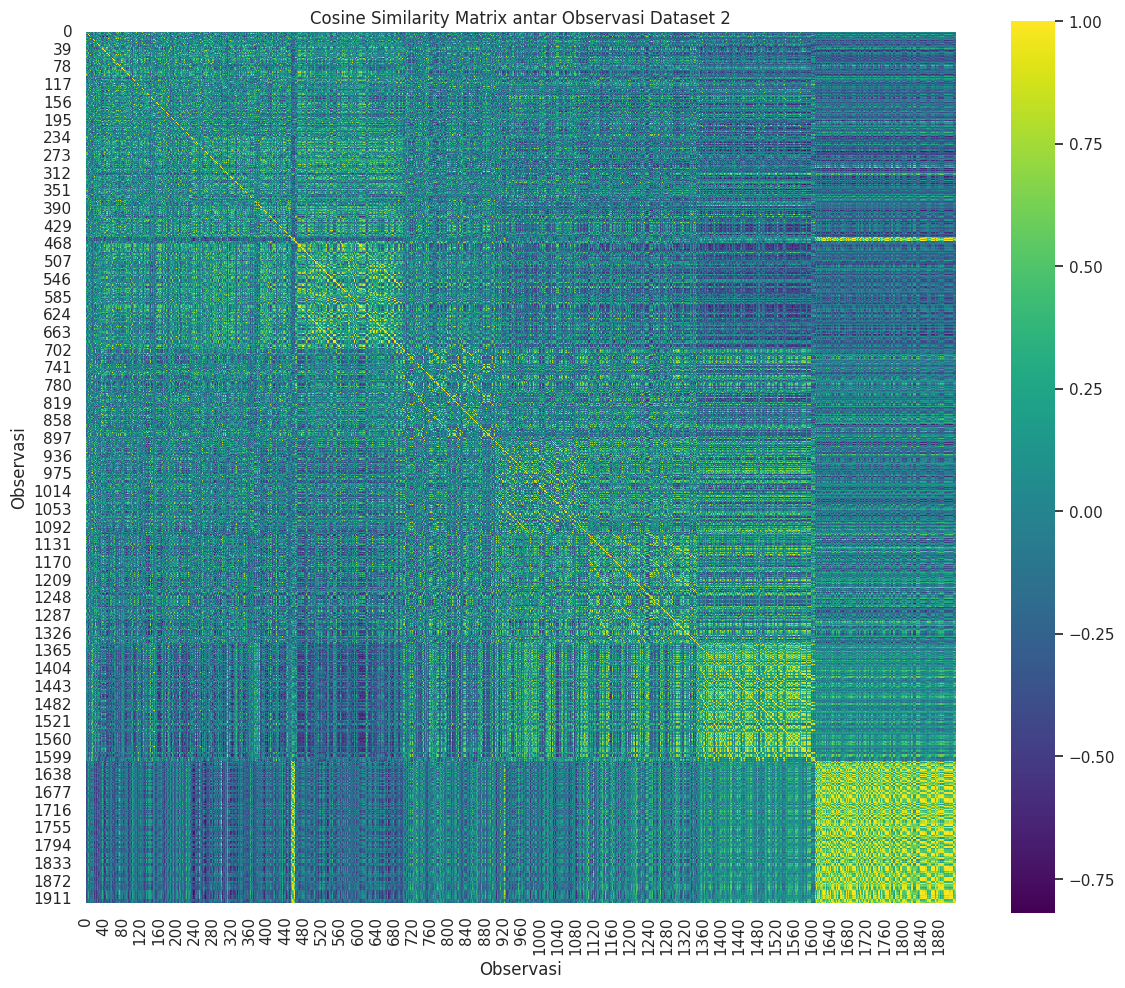

In [351]:
plot_cosine_similarity(df2_scaled, suffix=' Dataset 2')

#### Dataset 3

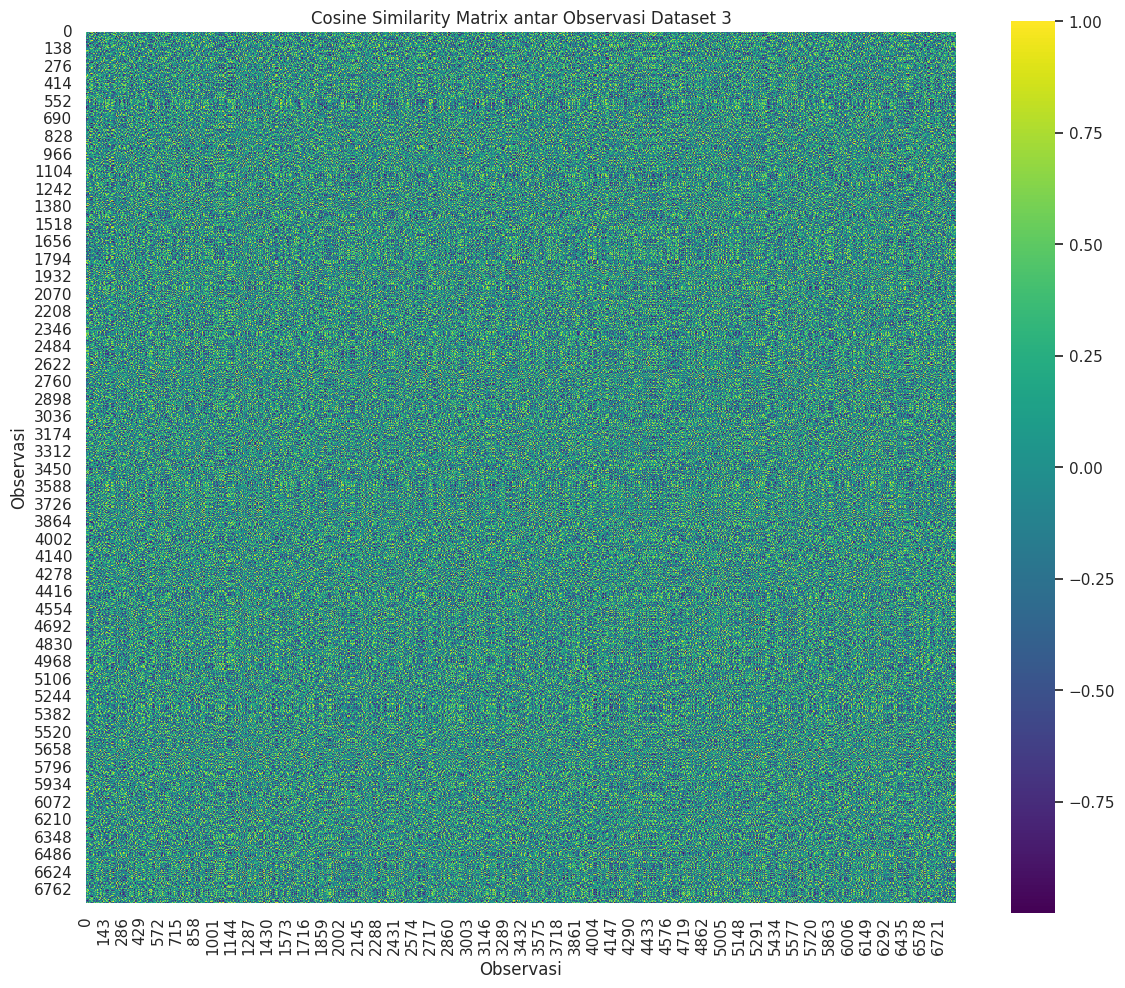

In [352]:
plot_cosine_similarity(df3_scaled, suffix=' Dataset 3')

## K-Means Clustering (CPU)

### Mencari K Optimal dengan Elbow Method

In [353]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [354]:
def plot_elbow_method(df_scaled: pd.DataFrame, k_min: int = 1, k_max: int = 11, random_state: int = 42) -> list:
    """
    Membuat plot Elbow Method untuk menentukan jumlah cluster optimal pada KMeans.

    Parameters
    ----------
    df_scaled : pd.DataFrame
        Data numerik yang sudah diskalakan.
    k_min : int, optional
        Nilai k terkecil, default 1
    k_max : int, optional
        Nilai k terbesar (exclusive), default 11
    random_state : int, optional
        Seed random untuk KMeans, default 42

    Returns
    -------
    list
        Daftar inertia untuk setiap nilai k yang diuji.
    """
    inertia = []
    k_range = range(k_min, k_max)

    for k in k_range:
        kmeans = KMeans(n_clusters=k, random_state=random_state)
        kmeans.fit(df_scaled)
        inertia.append(kmeans.inertia_)

    plt.figure(figsize=(8,5))
    plt.plot(list(k_range), inertia, 'bo-')
    plt.xlabel('Jumlah Cluster (k)')
    plt.ylabel('Inertia')
    plt.title('Metode Elbow untuk Penentuan k Optimal')
    plt.grid(True)
    plt.show()

    return inertia

In [355]:
def calculate_relative_scores(inertia: list) -> None:
    """
    Menghitung dan mencetak relative score penurunan inertia antar cluster pada Elbow Method.

    Args:
        inertia (list or array): List nilai inertia dari hasil KMeans untuk berbagai k.
    """
    for i in range(len(inertia) - 1):
        drop = (inertia[i] - inertia[i+1]) / inertia[i]
        print(f"Relative Score k={i+1} → k={i+2}: {drop:.2%}")

#### Dataset 1

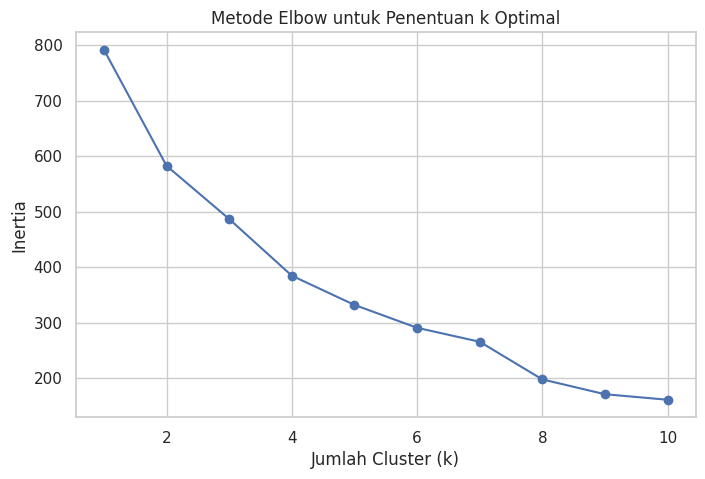

Relative Score k=1 → k=2: 26.43%
Relative Score k=2 → k=3: 16.46%
Relative Score k=3 → k=4: 21.00%
Relative Score k=4 → k=5: 13.70%
Relative Score k=5 → k=6: 12.44%
Relative Score k=6 → k=7: 8.66%
Relative Score k=7 → k=8: 25.57%
Relative Score k=8 → k=9: 13.53%
Relative Score k=9 → k=10: 5.83%


In [356]:
inertia = plot_elbow_method(df_scaled)
calculate_relative_scores(inertia)

#### Dataset 2

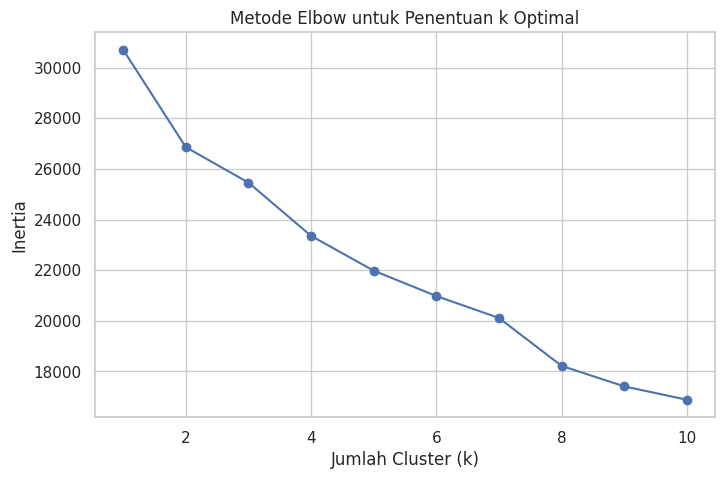

Relative Score k=1 → k=2: 12.53%
Relative Score k=2 → k=3: 5.21%
Relative Score k=3 → k=4: 8.26%
Relative Score k=4 → k=5: 5.88%
Relative Score k=5 → k=6: 4.55%
Relative Score k=6 → k=7: 4.14%
Relative Score k=7 → k=8: 9.40%
Relative Score k=8 → k=9: 4.44%
Relative Score k=9 → k=10: 3.03%


In [357]:
inertia = plot_elbow_method(df2_scaled)
calculate_relative_scores(inertia)

#### Dataset 3

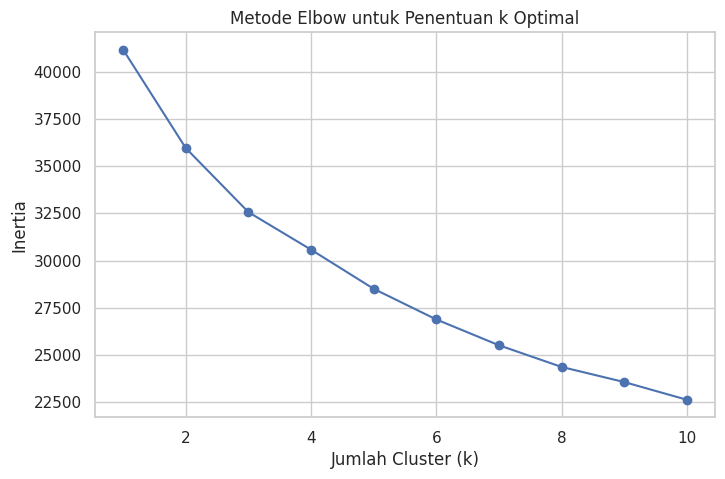

Relative Score k=1 → k=2: 12.65%
Relative Score k=2 → k=3: 9.43%
Relative Score k=3 → k=4: 6.10%
Relative Score k=4 → k=5: 6.78%
Relative Score k=5 → k=6: 5.69%
Relative Score k=6 → k=7: 5.08%
Relative Score k=7 → k=8: 4.50%
Relative Score k=8 → k=9: 3.29%
Relative Score k=9 → k=10: 3.98%


In [358]:
inertia = plot_elbow_method(df3_scaled)
calculate_relative_scores(inertia)

### Melakukan K-Means Clustering dengan K Optimal dan PCA

In [359]:
def apply_pca(df_scaled: pd.DataFrame, n_components: int = 2) -> pd.DataFrame:
    """
    Melakukan PCA pada DataFrame dan mengembalikan DataFrame hasil reduksi dimensi.

    Args
    ----
        df_scaled (pd.DataFrame): Data numerik yang sudah diskalakan.
        n_components (int): Jumlah komponen utama yang diambil.

    Returns
    ----
        pd.DataFrame: DataFrame dengan kolom PC1, PC2, ..., PCn.
    """
    pca = PCA(n_components=n_components)
    pca_data = pca.fit_transform(df_scaled)
    columns = [f'PC{i+1}' for i in range(n_components)]
    df_pca = pd.DataFrame(pca_data, columns=columns, index=df_scaled.index)
    return df_pca

#### Dataset 1

In [360]:
df_pca = apply_pca(df_scaled)

kmeans = KMeans(n_clusters=4, random_state=42)
cluster_labels = kmeans.fit_predict(df_pca)

df_pca['Cluster'] = cluster_labels

#### Dataset 2

In [361]:
df2_pca = apply_pca(df2_scaled)

kmeans = KMeans(n_clusters=7, random_state=42)
df2_cluster_labels = kmeans.fit_predict(df2_pca)

df2_pca['Cluster'] = df2_cluster_labels

#### Dataset 3

In [362]:
df3_pca = apply_pca(df3_scaled)

kmeans = KMeans(n_clusters=3, random_state=42)
df3_cluster_labels = kmeans.fit_predict(df3_pca)

df3_pca['Cluster'] = df3_cluster_labels

### Plotting Hasil K-Means Clustering

In [363]:
def plot_pca_clusters(
    df_pca: pd.DataFrame,
    x_col='PC1',
    y_col='PC2',
    cluster_col='Cluster',
    title='KMeans Clustering dengan PCA',
    suffix: str = "",
) -> None:
    """
    Membuat scatter plot hasil clustering dengan PCA.

    Args:
        df_pca (pd.DataFrame): DataFrame hasil PCA dan clustering.
        x_col (str): Nama kolom untuk sumbu X.
        y_col (str): Nama kolom untuk sumbu Y.
        cluster_col (str): Nama kolom cluster.
        title (str): Judul plot.
        figsize (tuple): Ukuran figure.
        palette (str): Palet warna.
        s (int): Ukuran marker.
    """
    plt.figure(figsize=(10, 6))
    sns.scatterplot(
        x=x_col, y=y_col, hue=cluster_col, palette='viridis', data=df_pca
    )
    plt.title(title + suffix)
    plt.show()

#### Dataset 1

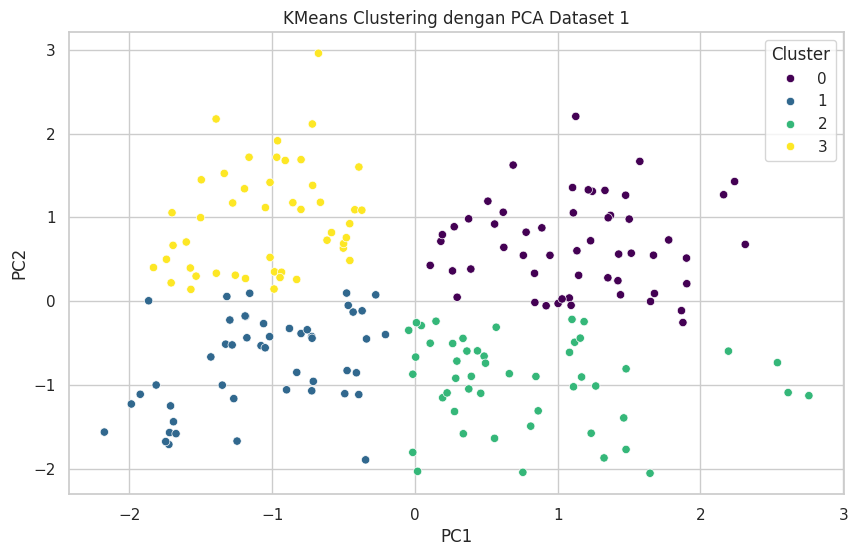

In [364]:
plot_pca_clusters(
    df_pca,
    suffix=' Dataset 1'
)

#### Dataset 2

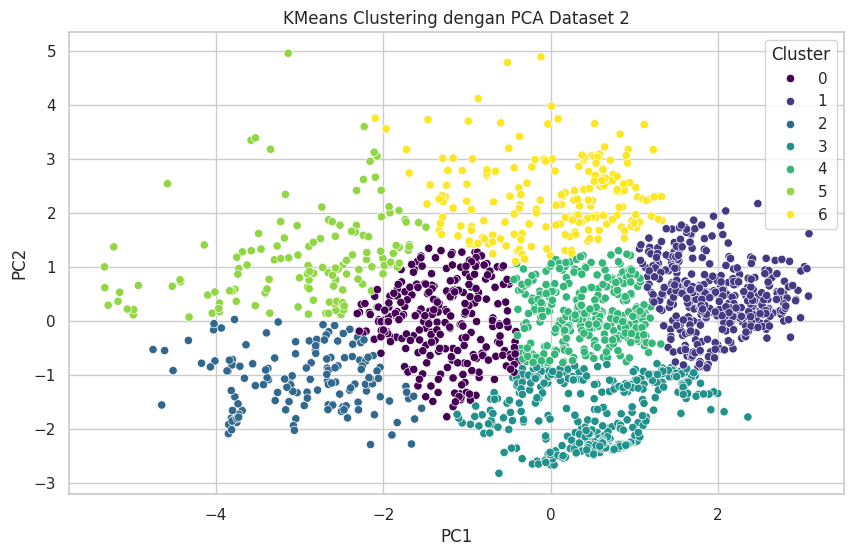

In [365]:
plot_pca_clusters(
    df2_pca,
    suffix=' Dataset 2'
)

#### Dataset 3

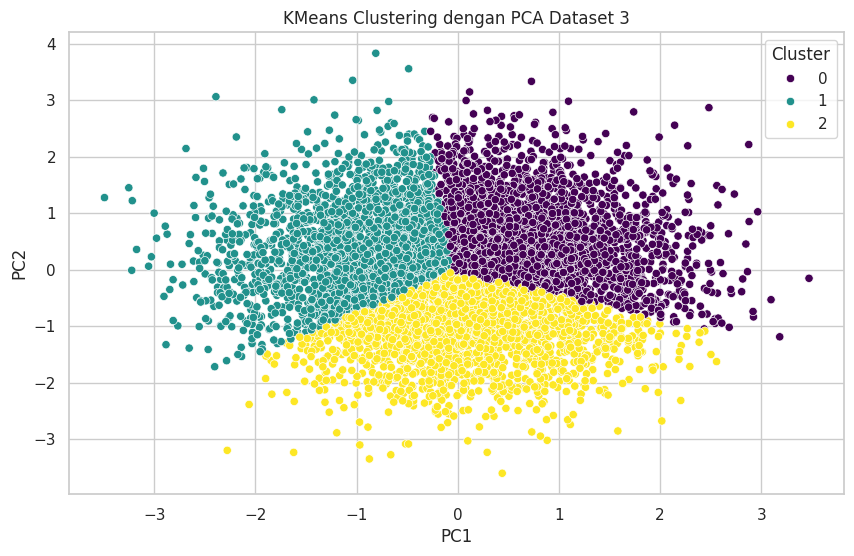

In [366]:
plot_pca_clusters(
    df3_pca,
    suffix=' Dataset 3'
)

### Menampilkan Silhouette Score

In [367]:
from sklearn.metrics import silhouette_score

#### Dataset 1

In [368]:
score = silhouette_score(df_pca[['PC1', 'PC2']], df_pca['Cluster'])
print(f'Silhouette Score: {score}')

Silhouette Score: 0.39686929198818405


#### Dataset 2

In [369]:
score = silhouette_score(df2_pca[['PC1', 'PC2']], df2_pca['Cluster'])
print(f'Silhouette Score: {score}')

Silhouette Score: 0.3789930014383781


#### Dataset 3

In [370]:
score = silhouette_score(df3_pca[['PC1', 'PC2']], df3_pca['Cluster'])
print(f'Silhouette Score: {score}')

Silhouette Score: 0.336456862167905


## Interpretation

### Masukan Hasil Clustering ke dalam DataFrame Encoded

#### Dataset 1

In [371]:
df_encoded['Cluster'] = cluster_labels

df_encoded.head()

Age  AnnualIncome  SpendingScore  Gender_Encoded  Cluster
0   19            15             39               0        1
1   21            15             81               0        1
2   20            16              6               1        2
3   23            16             77               1        1
4   31            17             40               1        1

#### Dataset 2

In [372]:
df2_encoded['Cluster'] = df2_cluster_labels

df2_encoded.head()

Age  Height  Weight  FCVC  NCP  CHO  FAF  TUE  SCC_Encoded  SMOKE_Encoded  \
0  21.0    1.62    64.0   2.0  3.0  2.0  0.0  1.0            0              0   
1  21.0    1.52    56.0   3.0  3.0  3.0  3.0  0.0            1              1   
2  23.0    1.80    77.0   2.0  3.0  2.0  2.0  1.0            0              0   
3  27.0    1.80    87.0   3.0  3.0  2.0  2.0  0.0            0              0   
4  22.0    1.78    89.8   2.0  1.0  2.0  0.0  0.0            0              0   

   FAVC_Encoded  familyhistory_Encoded  Gender_Encoded  CAEC_FreqEncoded  \
0             0                      0               0              1607   
1             0                      0               0              1607   
2             0                      0               1              1607   
3             0                      1               1              1607   
4             0                      1               1              1607   

   CALC_FreqEncoded  MTRANS_FreqEncoded  Cluster  
0               577                1549        0  
1              1286                1549        5  
2                55                1549        6  
3                55                  54        6  
4              1286                1549        0

#### Dataset 3

In [373]:
df3_encoded['Cluster'] = df3_cluster_labels

df3_encoded.head()

temperature   pressure  vibration   humidity  equipment_Encoded  \
0    58.180180  25.029278   0.606516  45.694907                  0   
1    75.740712  22.954018   2.338095  41.867407                  1   
2    71.358594  27.276830   1.389198  58.954409                  0   
3    71.616985  32.242921   1.770690  40.565138                  2   
4    66.506832  45.197471   0.345398  43.253795                  2   

   location_Encoded  Cluster  
0                 0        2  
1                 1        1  
2                 2        2  
3                 0        1  
4                 3        0

### Interpretasi Hasil Clustering Kolom Numerikal

In [374]:
def summarize_numerical_clusters(
    df: pd.DataFrame,
    categorical_encoded_cols: list,
    cluster_col: str = "Cluster"
) -> pd.DataFrame:
    """
    Menghasilkan ringkasan kategori (Very Low, Low, Medium, High) untuk setiap fitur numerik per cluster.

    Args:
        df (pd.DataFrame): DataFrame yang sudah diencoding dan memiliki kolom cluster.
        cluster_col (str): Nama kolom cluster.
        categorical_encoded_cols (list): Daftar kolom kategorikal yang sudah diencoding.

    Returns:
        pd.DataFrame: DataFrame ringkasan kategori per cluster.
    """
    # Ambil fitur numerik asli (tanpa encoded & cluster)
    features_to_summarize = df.drop(columns=categorical_encoded_cols + [cluster_col]).columns
    cluster_means = df.groupby(cluster_col)[features_to_summarize].mean()

    # Ambil kuartil dari keseluruhan dataset (bukan per cluster)
    quantiles = df[features_to_summarize].quantile([0.25, 0.5, 0.75])

    # Fungsi untuk mengubah nilai rata-rata menjadi label kategori
    def categorize(value, feature):
        if value < quantiles.loc[0.25, feature]:
            return "Very Low"
        elif value < quantiles.loc[0.5, feature]:
            return "Low"
        elif value < quantiles.loc[0.75, feature]:
            return "Medium"
        else:
            return "High"

    # Terapkan ke semua nilai dalam cluster_means
    categorized_summary = cluster_means.copy()
    for feature in features_to_summarize:
        categorized_summary[feature] = cluster_means[feature].apply(lambda x: categorize(x, feature))

    return categorized_summary

#### Dataset 1

In [375]:
categorical_encoded_to_summarize = [col + "_Encoded" for col in lbl_encode_cols] + [col + "_FreqEncoded" for col in freq_encode_cols]

summarize_numerical_clusters(df_encoded, categorical_encoded_to_summarize)

Age AnnualIncome SpendingScore
Cluster                                     
0          Medium       Medium      Very Low
1        Very Low          Low        Medium
2            High          Low           Low
3             Low         High          High

#### Dataset 2

In [376]:
df2_categorical_encoded_to_summarize = [col + "_Encoded" for col in df2_lbl_encode_cols] + [col + "_FreqEncoded" for col in df2_freq_encode_cols]

summarize_numerical_clusters(df2_encoded, df2_categorical_encoded_to_summarize)

Age    Height    Weight    FCVC       NCP       CHO     FAF  \
Cluster                                                                   
0           Low       Low       Low     Low  Very Low       Low  Medium   
1          High      High      High     Low       Low    Medium  Medium   
2           Low  Very Low  Very Low  Medium  Very Low  Very Low     Low   
3        Medium       Low      High  Medium  Very Low    Medium     Low   
4        Medium    Medium       Low     Low  Very Low       Low     Low   
5           Low       Low  Very Low     Low       Low       Low  Medium   
6           Low      High       Low     Low      High    Medium    High   

            TUE  
Cluster          
0        Medium  
1           Low  
2        Medium  
3           Low  
4        Medium  
5           Low  
6        Medium

#### Dataset 3

In [377]:
df3_categorical_encoded_to_summarize = [col + "_Encoded" for col in df3_lbl_encode_cols] + [col + "_FreqEncoded" for col in df3_freq_encode_cols]

summarize_numerical_clusters(df3_encoded, df3_categorical_encoded_to_summarize)

temperature pressure vibration humidity
Cluster                                        
0            Medium   Medium       Low      Low
1            Medium      Low       Low   Medium
2          Very Low   Medium    Medium   Medium

### Interpretasi Hasil Clustering Kolom Encoded

In [378]:
def summarize_categorical_by_cluster(df: pd.DataFrame, cat_cols: list) -> None:
  for cat_col in cat_cols:
    # Hitung jumlah
    summary_count = df.groupby(["Cluster", cat_col], observed=True).size().unstack(fill_value=0)

    # Hitung persentase
    summary_pct = summary_count.div(summary_count.sum(axis=1), axis=0) * 100

    # Tambahkan total anggota per cluster
    summary_count['Total'] = summary_count.sum(axis=1)
    summary_pct['Total'] = 100.0  # karena persentase total selalu 100

    print(f"\nPersentase untuk kolom '{cat_col}' per cluster:")
    display(summary_pct.round(2))

In [379]:
def decode_categorical_columns(df_encoded: pd.DataFrame, df: pd.DataFrame, categorical_encoded: list) -> pd.DataFrame:
    """
    Mengembalikan kolom kategorikal yang telah diencoding ke bentuk aslinya.

    Parameters
    ----------
    df_encoded : pd.DataFrame
        DataFrame yang berisi kolom-kolom yang telah diencoding.
    df : pd.DataFrame
        DataFrame asli yang berisi kolom-kolom kategorikal sebelum encoding.
    categorical_encoded : list
        Daftar nama kolom kategorikal yang telah diencoding (baik label encoding maupun frequency encoding).

    Returns
    -------
    pd.DataFrame
        DataFrame dengan kolom-kolom yang telah didecode.
    """
    df_decoded = df_encoded.copy()
    for cat_col in categorical_encoded:
        df_decoded[cat_col] = df[cat_col.replace('_Encoded', '').replace('_FreqEncoded', '')]
        df_decoded[cat_col] = df_decoded[cat_col].astype('category')

    # Gantikan nama kolom kategorikal yang sudah diencoding
    df_decoded.rename(columns={col: col.replace('_Encoded', '').replace('_FreqEncoded', '') for col in categorical_encoded}, inplace=True)

    return df_decoded

#### Dataset 1

In [380]:
df_decoded = decode_categorical_columns(df_encoded, df, categorical_encoded_to_summarize)
df_decoded.head()

Age  AnnualIncome  SpendingScore  Gender  Cluster
0   19            15             39    Male        1
1   21            15             81    Male        1
2   20            16              6  Female        2
3   23            16             77  Female        1
4   31            17             40  Female        1

In [381]:
summarize_categorical_by_cluster(df_decoded, lbl_encode_cols + freq_encode_cols)


Persentase untuk kolom 'Gender' per cluster:


Gender   Female   Male  Total
Cluster                      
0         25.93  74.07  100.0
1         79.17  20.83  100.0
2         83.67  16.33  100.0
3         40.43  59.57  100.0

#### Dataset 2

In [382]:
df2_decoded = decode_categorical_columns(df2_encoded, df2, df2_categorical_encoded_to_summarize)
df2_decoded.head()

Age  Height  Weight  FCVC  NCP  CHO  FAF  TUE  SCC SMOKE FAVC  \
0  21.0    1.62    64.0   2.0  3.0  2.0  0.0  1.0   no    no   no   
1  21.0    1.52    56.0   3.0  3.0  3.0  3.0  0.0  yes   yes   no   
2  23.0    1.80    77.0   2.0  3.0  2.0  2.0  1.0   no    no   no   
3  27.0    1.80    87.0   3.0  3.0  2.0  2.0  0.0   no    no   no   
4  22.0    1.78    89.8   2.0  1.0  2.0  0.0  0.0   no    no   no   

  familyhistory  Gender       CAEC        CALC                 MTRANS  Cluster  
0           yes  Female  Sometimes          no  Public_Transportation        0  
1           yes  Female  Sometimes   Sometimes  Public_Transportation        5  
2           yes    Male  Sometimes  Frequently  Public_Transportation        6  
3            no    Male  Sometimes  Frequently                Walking        6  
4            no    Male  Sometimes   Sometimes  Public_Transportation        0

In [383]:
summarize_categorical_by_cluster(df2_decoded, df2_lbl_encode_cols + df2_freq_encode_cols)


Persentase untuk kolom 'SCC' per cluster:


SCC          no    yes  Total
Cluster                      
0         98.21   1.79  100.0
1        100.00   0.00  100.0
2         76.39  23.61  100.0
3        100.00   0.00  100.0
4        100.00   0.00  100.0
5         71.63  28.37  100.0
6         92.68   7.32  100.0


Persentase untuk kolom 'SMOKE' per cluster:


SMOKE       no   yes  Total
Cluster                    
0        97.50  2.50  100.0
1        96.10  3.90  100.0
2        99.31  0.69  100.0
3        99.51  0.49  100.0
4        99.39  0.61  100.0
5        97.87  2.13  100.0
6        96.10  3.90  100.0


Persentase untuk kolom 'FAVC' per cluster:


FAVC        no    yes  Total
Cluster                     
0        17.50  82.50  100.0
1         1.22  98.78  100.0
2        22.22  77.78  100.0
3         0.49  99.51  100.0
4         2.74  97.26  100.0
5        58.16  41.84  100.0
6        22.93  77.07  100.0


Persentase untuk kolom 'familyhistory' per cluster:


familyhistory     no     yes  Total
Cluster                            
0              29.64   70.36  100.0
1               0.00  100.00  100.0
2              68.06   31.94  100.0
3               0.24   99.76  100.0
4               2.13   97.87  100.0
5              78.01   21.99  100.0
6              25.85   74.15  100.0


Persentase untuk kolom 'Gender' per cluster:


Gender   Female   Male  Total
Cluster                      
0         73.21  26.79  100.0
1          5.61  94.39  100.0
2        100.00   0.00  100.0
3         93.43   6.57  100.0
4         19.51  80.49  100.0
5         76.60  23.40  100.0
6          3.41  96.59  100.0


Persentase untuk kolom 'CAEC' per cluster:


CAEC     Always  Frequently  Sometimes    no  Total
Cluster                                            
0          4.29       22.86      65.36  7.50  100.0
1          0.00        0.73      99.27  0.00  100.0
2          1.39       28.47      70.14  0.00  100.0
3          0.24        0.00      99.76  0.00  100.0
4          0.61        2.44      96.95  0.00  100.0
5         11.35       53.90      27.66  7.09  100.0
6          7.80       16.59      72.68  2.93  100.0


Persentase untuk kolom 'CALC' per cluster:


CALC     Always  Frequently  Sometimes     no  Total
Cluster                                             
0          0.00        3.21      48.93  47.86  100.0
1          0.00        0.00      92.44   7.56  100.0
2          0.00        0.69      61.11  38.19  100.0
3          0.00        0.00      87.83  12.17  100.0
4          0.00        4.57      57.93  37.50  100.0
5          0.00        6.38      50.35  43.26  100.0
6          0.49       10.24      29.27  60.00  100.0


Persentase untuk kolom 'MTRANS' per cluster:


MTRANS   Automobile  Bike  Motorbike  Public_Transportation  Walking  Total
Cluster                                                                    
0              3.93  0.00       0.36                  93.21     2.50  100.0
1             32.44  0.00       0.00                  65.37     2.20  100.0
2              4.17  0.00       0.00                  95.14     0.69  100.0
3              5.84  0.00       0.00                  94.16     0.00  100.0
4             12.50  0.00       0.61                  85.37     1.52  100.0
5              8.51  0.00       1.42                  82.27     7.80  100.0
6             36.10  2.93       1.95                  48.78    10.24  100.0

#### Dataset 3

In [384]:
df3_decoded = decode_categorical_columns(df3_encoded, df3, df3_categorical_encoded_to_summarize)
df3_decoded.head()

temperature   pressure  vibration   humidity   equipment       location  \
0    58.180180  25.029278   0.606516  45.694907     Turbine        Atlanta   
1    75.740712  22.954018   2.338095  41.867407  Compressor        Chicago   
2    71.358594  27.276830   1.389198  58.954409     Turbine  San Francisco   
3    71.616985  32.242921   1.770690  40.565138        Pump        Atlanta   
4    66.506832  45.197471   0.345398  43.253795        Pump       New York   

   Cluster  
0        2  
1        1  
2        2  
3        1  
4        0

In [385]:
summarize_categorical_by_cluster(df3_decoded, df3_lbl_encode_cols + df3_freq_encode_cols)


Persentase untuk kolom 'equipment' per cluster:


equipment  Compressor   Pump  Turbine  Total
Cluster                                     
0               35.76  27.98    36.26  100.0
1               31.69  58.54     9.77  100.0
2               32.45  13.16    54.39  100.0


Persentase untuk kolom 'location' per cluster:


location  Atlanta  Chicago  Houston  New York  San Francisco  Total
Cluster                                                            
0            1.72     7.58    43.42     30.93          16.35  100.0
1           29.05    27.03     7.66     14.84          21.43  100.0
2           32.91    27.33     7.04     13.07          19.65  100.0

### Melihat Persebaran Cluster

In [386]:
def analyze_cluster_distribution(df_encoded: pd.DataFrame, cluster_col: str = 'Cluster') -> None:
    """
    Menampilkan persentase distribusi anggota pada setiap cluster.

    Parameters
    ----------
    df_encoded : pd.DataFrame
        DataFrame yang sudah memiliki kolom cluster.
    cluster_col : str, optional
        Nama kolom yang berisi label cluster, default 'Cluster'.

    Returns
    -------
    None
        Menampilkan DataFrame dengan persentase anggota per cluster.
    """
    cluster_percentages = (
        df_encoded[cluster_col]
        .value_counts(normalize=True)
        .mul(100)
        .round(2)
        .sort_values(ascending=False)
    )

    # Ubah menjadi DataFrame agar lebih rapi
    cluster_stats = cluster_percentages.reset_index()
    cluster_stats.columns = [cluster_col, 'Percentage (%)']

    display(cluster_stats)

#### Dataset 1

In [387]:
analyze_cluster_distribution(df_decoded)

Cluster  Percentage (%)
0        0           27.27
1        2           24.75
2        1           24.24
3        3           23.74

#### Dataset 2

In [388]:
analyze_cluster_distribution(df2_decoded)

Cluster  Percentage (%)
0        3           21.42
1        1           21.37
2        4           17.09
3        0           14.59
4        6           10.68
5        2            7.50
6        5            7.35

#### Dataset 3

In [389]:
analyze_cluster_distribution(df3_decoded)

Cluster  Percentage (%)
0        0           35.58
1        1           32.52
2        2           31.90

## Kesimpulan Akhir

#### Dataset 1

📊 **Rekapitulasi Segmentasi Pelanggan Mall**

| 🧭 Cluster | 🎯 Segment Name        | Age      | Annual Income | Spending Score | 📝 Description                                                                                                                  |
| ---------- | ---------------------- | -------- | ------------- | -------------- | ------------------------------------------------------------------------------------------------------------------------------- |
| **0**      | 🏦 Conservative Savers | Medium   | Medium        | Very Low       | Pelanggan usia menengah dengan pendapatan cukup namun sangat berhati-hati dalam berbelanja. Fokus utama pada menabung.          |
| **1**      | 👶 Impulsif Muda       | Very Low | Low           | Medium         | Pelanggan usia muda dengan pendapatan rendah namun memiliki kecenderungan berbelanja moderat. Potensial untuk pemasaran diskon. |
| **2**      | 🧓 Senior Ekonomis     | High     | Low           | Low            | Pelanggan berusia lanjut dengan pendapatan rendah dan pola belanja hemat. Lebih suka produk fungsional dan tahan lama.          |
| **3**      | 💎 Premium Shopper     | Low      | High          | High           | Pelanggan usia produktif dengan pendapatan tinggi dan sangat konsumtif. Cocok untuk pemasaran produk premium dan eksklusif.     |

---

📌 **Analisis Per Cluster Berdasarkan Persentase**

* 🏦 **Cluster 0: Conservative Savers (27.3%)**

  * **Demografi:** Usia menengah, 74% laki-laki, pendapatan menengah
  * **Perilaku:** Sangat berhati-hati dalam berbelanja meski mampu secara finansial. Cenderung menyimpan uang dan menghindari pembelian impulsif.
  * **Strategi Mall:**

    * Program loyalty berbasis poin atau cashback
    * Kolaborasi tenant dengan bank atau institusi finansial
    * Tenant kebutuhan sehari-hari, produk rumah tangga
    * Event edukasi finansial, diskon weekday untuk pembelian bulk

* 🧓 **Cluster 2: Senior Ekonomis (24.8%)**

  * **Demografi:** Usia senior, 83% perempuan, pendapatan rendah
  * **Perilaku:** Rasional, berorientasi fungsi, sensitif terhadap harga. Menghindari pemborosan, cenderung membeli barang esensial
  * **Strategi Mall:**

    * Diskon khusus lansia, paket hemat, dan produk bundling
    * Tenant kesehatan, farmasi, pakaian nyaman, dan alat bantu
    * Area duduk nyaman, akses lift/escalator mudah
    * Program loyalitas berbasis keanggotaan senior

* 👶 **Cluster 1: Impulsif Muda (24.2%)**

  * **Demografi:** Usia sangat muda, 79% perempuan, pendapatan rendah
  * **Perilaku:** Aktif berbelanja, tertarik pada tren dan penawaran diskon, mudah dipengaruhi promosi meski terbatas secara finansial
  * **Strategi Mall:**

    * Flash sale, promo musiman, campaign TikTok & Instagram
    * Tenant fast fashion, beauty, F\&B kekinian
    * Sistem pembayaran ringan: cicilan 0%, QRIS, e-wallet
    * Area photo spot & digital experience zone untuk engagement

* 💎 **Cluster 3: Premium Shopper (23.7%)**

  * **Demografi:** Usia produktif, 60% laki-laki, pendapatan tinggi
  * **Perilaku:** Konsumtif, peduli merek, suka belanja eksklusif dan premium. Sering mencari pengalaman belanja yang nyaman dan personalized
  * **Strategi Mall:**

    * Tenant luxury brand, butik eksklusif
    * Lounge VIP, parkir valet, layanan concierge
    * Event private shopping, preview produk, dan event tertutup
    * Kolaborasi tenant dengan artis atau brand ambassador

---

📘 **Definisi Istilah**

| Istilah            | Arti                                                                   |
| ------------------ | ---------------------------------------------------------------------- |
| **Age**            | Kelompok usia pelanggan (Very Low = sangat muda, High = senior/lansia) |
| **Annual Income**  | Pendapatan tahunan pelanggan relatif terhadap skala populasi           |
| **Spending Score** | Skor belanja berdasarkan frekuensi dan jumlah pengeluaran              |

#### Dataset 2

📊 **Rekapitulasi Segmentasi Cluster Obesitas**

| 🧭 Cluster | 🎯 Segment Name                  | Age    | Height   | Weight   | FCVC   | NCP      | CHO      | FAF    | TUE    | 📝 Description                                                                                                                                                  |
| ---------- | -------------------------------- | ------ | -------- | -------- | ------ | -------- | -------- | ------ | ------ | --------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| **0**      | 👦 Remaja Berisiko Obesitas      | Low    | Low      | Low      | Low    | Very Low | Low      | Medium | Medium | Remaja dengan tinggi dan berat badan rendah serta konsumsi makanan sehat rendah. Aktivitas fisik sedang, namun berisiko obesitas karena pola makan kurang baik. |
| **1**      | 🧑 Dewasa Obesitas Stabil        | High   | High     | High     | Low    | Low      | Medium   | Medium | Low    | Dewasa dengan berat badan tinggi dan aktivitas sedang. Konsumsi makanan sehat rendah, berisiko obesitas jika pola hidup tidak diperbaiki.                       |
| **2**      | 👧 Anak Sangat Berisiko Obesitas | Low    | Very Low | Very Low | Medium | Very Low | Very Low | Low    | Medium | Anak-anak dengan tubuh sangat kecil dan pola makan tidak seimbang. Aktivitas fisik rendah membuat risiko obesitas meningkat.                                    |
| **3**      | 🧑 Dewasa Obesitas Potensial     | Medium | Low      | High     | Medium | Very Low | Medium   | Low    | Low    | Dewasa dengan berat badan tinggi namun tinggi badan rendah. Pola makan cukup baik, tetapi minim aktivitas fisik, berisiko obesitas.                             |
| **4**      | 🧑 Dewasa Kurang Aktif           | Medium | Medium   | Low      | Low    | Very Low | Low      | Low    | Medium | Dewasa dengan aktivitas dan konsumsi sehat rendah. Berat badan rendah, tetapi risiko obesitas tetap ada karena pola hidup pasif.                                |
| **5**      | 👦 Remaja Kurang Energi          | Low    | Low      | Very Low | Low    | Low      | Low      | Medium | Low    | Remaja dengan asupan nutrisi dan berat badan sangat rendah. Aktivitas fisik sedang, cenderung kurang energi daripada obesitas.                                  |
| **6**      | 🏃 Remaja Atletis Sehat          | Low    | High     | Low      | Low    | High     | Medium   | High   | Medium | Remaja dengan tinggi badan tinggi dan berat badan rendah, sangat aktif dan pola makan cukup baik. Rendah risiko obesitas.                                       |

---

📌 **Analisis Per Cluster Berdasarkan Persentase**

* 🏃‍♂️ **Cluster 3: Dewasa Obesitas Potensial (21.42%)**

  * **Demografi:** Dewasa, 93% perempuan, tinggi badan rendah, berat badan tinggi
  * **Perilaku:** Aktivitas fisik sangat rendah, makan cepat saji hampir selalu, riwayat keluarga obesitas tinggi (99.76%)
  * **Catatan Kesehatan:**

    * **FAF (Frekuensi Aktivitas Fisik):** rendah → faktor risiko obesitas
    * **CAEC (Kebiasaan Makan Berlebih):** sangat sering
    * **Family History:** riwayat genetik sangat kuat
  * **Strategi Kesehatan:**

    * Program peningkatan aktivitas fisik ringan untuk dewasa
    * Edukasi nutrisi seimbang & kontrol porsi
    * Konseling genetik dan risiko metabolik

* 🧑 **Cluster 1: Dewasa Obesitas Stabil (21.37%)**

  * **Demografi:** Dewasa, 94% laki-laki, tinggi dan berat badan tinggi
  * **Perilaku:** Sering konsumsi cepat saji (FAVC 98.78%), sangat jarang aktivitas fisik intensif, memiliki riwayat keluarga obesitas penuh (100%)
  * **Catatan Kesehatan:**

    * **FAF:** sedang → belum cukup menekan risiko
    * **CAEC:** sering ngemil meski berat stabil
  * **Strategi Kesehatan:**

    * Intervensi perubahan pola makan (pengurangan fast food)
    * Pemeriksaan metabolik berkala
    * Kampanye gaya hidup sehat berbasis komunitas pria

* 🧑‍💻 **Cluster 4: Dewasa Kurang Aktif (17.09%)**

  * **Demografi:** Dewasa, 80% laki-laki, berat badan relatif rendah
  * **Perilaku:** Pola makan tidak sehat, minim aktivitas fisik, 97% memiliki riwayat obesitas dalam keluarga
  * **Catatan Kesehatan:**

    * **FAF & TUE:** rendah → tubuh pasif meski berat belum tinggi
    * **MTRANS:** dominan transportasi pasif
  * **Strategi Kesehatan:**

    * Aktivasi olahraga ringan di tempat kerja
    * Kampanye deteksi dini sindrom metabolik
    * Pelatihan kebiasaan makan sadar (mindful eating)

* 👦 **Cluster 0: Remaja Berisiko Obesitas (14.59%)**

  * **Demografi:** Remaja, 73% perempuan, tinggi dan berat badan rendah
  * **Perilaku:** 82% konsumsi cepat saji, aktivitas fisik sedang, 70% ada riwayat obesitas keluarga
  * **Catatan Kesehatan:**

    * **SCC (Kontrol Diri Makan):** rendah → potensi binge eating
    * **CAEC:** sering ngemil
  * **Strategi Kesehatan:**

    * Edukasi sekolah: pola makan sehat & self-control
    * Pemberdayaan keluarga untuk perubahan kebiasaan makan
    * Promosi alternatif camilan sehat untuk remaja

* 🏃‍♂️ **Cluster 6: Remaja Atletis Sehat (10.68%)**

  * **Demografi:** Remaja, 97% laki-laki, tinggi badan tinggi, berat badan rendah
  * **Perilaku:** Sangat aktif (FAF & TUE tinggi), konsumsi sehat cukup, 74% punya riwayat keluarga obesitas
  * **Catatan Kesehatan:**

    * **MTRANS:** dominan transportasi aktif (jalan kaki & kendaraan umum)
    * **SCC:** cukup baik, kontrol diri tinggi
  * **Strategi Kesehatan:**

    * Dukungan gaya hidup aktif berkelanjutan
    * Pemantauan tumbuh kembang atlet muda
    * Promosi role model sehat di kalangan pelajar

* 👧 **Cluster 2: Anak Sangat Berisiko Obesitas (7.50%)**

  * **Demografi:** Anak-anak, 100% perempuan, tubuh sangat kecil
  * **Perilaku:** Sering ngemil, konsumsi cepat saji tinggi, aktivitas rendah
  * **Catatan Kesehatan:**

    * **CAEC:** sangat tinggi → kebiasaan makan emosional
    * **FAF:** rendah → minim kalori terbakar
    * **SCC:** cukup baik, tapi perlu dibentuk sejak dini
  * **Strategi Kesehatan:**

    * Intervensi orang tua dalam pola makan anak
    * Penyuluhan pencegahan obesitas sejak usia dini
    * Kurikulum aktivitas fisik rutin di sekolah dasar

* 👦 **Cluster 5: Remaja Kurang Energi (7.35%)**

  * **Demografi:** Remaja, 77% perempuan, berat badan sangat rendah
  * **Perilaku:** Minim konsumsi cepat saji, aktivitas sedang, 78% tidak memiliki riwayat keluarga obesitas
  * **Catatan Kesehatan:**

    * **NCP (Frekuensi Makan per Hari):** rendah → asupan energi kurang
    * **FAF:** sedang tapi tidak diimbangi nutrisi
  * **Strategi Kesehatan:**

    * Pemantauan status gizi remaja kurus
    * Program peningkatan asupan kalori sehat
    * Edukasi remaja soal pentingnya nutrisi cukup

---

📘 **Definisi Istilah**

| Singkatan  | Arti                                                            |
| ---------- | --------------------------------------------------------------- |
| **FCVC**   | Frekuensi konsumsi sayur dan buah                               |
| **NCP**    | Jumlah makanan utama per hari                                   |
| **CHO**    | Konsumsi karbohidrat                                            |
| **FAF**    | Frekuensi aktivitas fisik                                       |
| **TUE**    | Waktu menggunakan perangkat elektronik per hari                 |
| **CAEC**   | Kebiasaan makan berlebih (frekuensi ngemil di luar waktu makan) |
| **SCC**    | Self-control consumption (tingkat kontrol diri saat makan)      |
| **FAVC**   | Konsumsi makanan cepat saji                                     |
| **MTRANS** | Jenis transportasi utama yang digunakan (aktif/pasif)           |

#### Dataset 3

🔧 **Rekapitulasi Segmentasi Kondisi Peralatan Industri**

| 🧭 Cluster | 🎯 Segment Name         | Temperature | Pressure | Vibration | Humidity | 📝 Description                                                                                              |
| ---------- | ----------------------- | ----------- | -------- | --------- | -------- | ----------------------------------------------------------------------------------------------------------- |
| **0**      | 🔍 Stabil Rendah Risiko | Medium      | Medium   | Low       | Low      | Peralatan dengan kondisi operasi relatif stabil dan risiko anomali rendah. Dominan di Houston dan New York. |
| **1**      | ⚠️ Tidak Stabil Basah   | Medium      | Low      | Low       | Medium   | Peralatan di lingkungan lembap dan tekanan rendah. Dominan berupa *Pump* dan tersebar di banyak lokasi.     |
| **2**      | 🔧 Getaran Menengah     | Very Low    | Medium   | Medium    | Medium   | Peralatan dengan getaran dan kelembapan sedang, serta suhu sangat rendah. Banyak digunakan di *Turbine*.    |

---

📌 **Analisis Per Cluster Berdasarkan Persentase**

* **🔍 Cluster 0: Stabil Rendah Risiko (35.58%)**

  * **Kondisi:** Temperatur dan tekanan menengah, getaran serta kelembapan rendah → menunjukkan kestabilan operasional tinggi
  * **Tipe Peralatan:**

    * *Compressor*: 35.76%
    * *Pump*: 27.98%
    * *Turbine*: 36.26%
  * **Lokasi Dominan:** Houston (43.42%) dan New York (30.93%)
  * **Catatan:** Cocok sebagai baseline sistem karena menunjukkan kondisi normal. Diperlukan pemeliharaan rutin standar.

* **⚠️ Cluster 1: Tidak Stabil Basah (32.52%)**

  * **Kondisi:** Tekanan rendah dan kelembapan sedang → potensi ketidakstabilan operasional meningkat
  * **Tipe Peralatan:**

    * *Pump*: 58.54% (dominasi signifikan)
    * *Compressor*: 31.69%
    * *Turbine*: 9.77%
  * **Lokasi Dominan:** Atlanta (29.05%) dan Chicago (27.03%)
  * **Catatan:** Area lembap berisiko terhadap korosi dan kegagalan sistem tekanan rendah. Perlu pemantauan tekanan & kelembapan intensif, terutama pada pompa.

* **🔧 Cluster 2: Getaran Menengah (31.90%)**

  * **Kondisi:** Suhu sangat rendah, getaran & kelembapan sedang → sinyal peringatan awal terhadap keausan atau ketidakseimbangan
  * **Tipe Peralatan:**

    * *Turbine*: 54.39%
    * *Compressor*: 32.45%
    * *Pump*: 13.16%
  * **Lokasi Dominan:** Atlanta (32.91%) dan Chicago (27.33%)
  * **Catatan:** Turbine yang beroperasi dengan getaran sedang perlu diperiksa potensi gejala keausan dini atau resonansi. Sensor getaran dan audit mekanik disarankan.

---

📘 **Definisi Istilah**

| Istilah       | Arti                                                                                                                  |
| ------------- | --------------------------------------------------------------------------------------------------------------------- |
| **Vibration** | Tingkat getaran saat mesin berjalan; indikator awal kerusakan mekanik seperti ketidakseimbangan atau keausan komponen |
| **Humidity**  | Kelembapan lingkungan sekitar peralatan yang dapat mempengaruhi kinerja dan ketahanan mesin                           |
| **Cluster**   | Hasil segmentasi peralatan berdasarkan pola perilaku kondisi sensornya menggunakan metode klasterisasi                |